In [1]:
from master_thesis.src import utils
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 80) # make all columns visible

In [3]:
full = utils.get_full_df()
print(full.shape)

Shape of df: (32272, 33)
Shape of df: (21481, 33)
Shape of df: (17023, 31)
Shape of df: (36383, 31)
Shared columns: {'prozentVerlag', 'date', 'teaser', 'avgTimeOnPagePerWordcount_percentile', 'exits', 'bounces', 'entrances', 'nr_tokens_text_punct', 'rubric', 'avgTimeOnPage_percentile', 'timeOnPage', 'language', 'publisher', 'pageviews_percentile', 'pageviews', 'pagePath', 'nr_tokens_publisher', 'category', 'zeilen', 'avgTimeOnPage', 'nr_tokens_text_BERT', 'article_text', 'nr_tokens_text', 'prozentDpa', 'titel', 'dpaGuid', 'avgTimeOnPagePerWordcount'}
Shape of raw df: (107159, 27)
(107159, 27)


In [73]:
#full.columns

In [74]:
full.language.value_counts()

de    107159
Name: language, dtype: int64

In [75]:
full.head(5)

nr_tokens_publisher  exits   rubric  timeOnPage  bounces  \
articleId                                                             
SZ_16591                   535   1382    recht     48968.0       76   
SZ_16595                   250     40    recht      2123.0        6   
SZ_16723                   231    308    recht      9972.0       26   
SZ_17146                   785     36  momente      6386.0        1   
SZ_17184                   398    124    recht      9702.0        9   

           avgTimeOnPagePerWordcount_percentile  date  \
articleId                                               
SZ_16591                              40.812469   NaN   
SZ_16595                              66.788547   NaN   
SZ_16723                              67.581805   NaN   
SZ_17146                              55.958726   NaN   
SZ_17184                              70.215667   NaN   

                                                article_text  \
articleId                                                      
SZ_16591   Coburg Sehr viele Eltern haben eine Vollmacht ...   
SZ_16595   Berlin Das Verwaltungsgericht Berlin hat entsc...   
SZ_16723   Coburg Nicht jeder Rohrbruch ist versichert: B...   
SZ_17146   Alfons Hewener heiratete erst spät. Wadgassen....   
SZ_17184   München Ein Käufer kann erst dann von einem Ka...   

           pageviews_percentile  nr_tokens_text_punct dpaGuid  \
articleId                                                       
SZ_16591              90.448376                   599     NaN   
SZ_16595               3.960089                   282     NaN   
SZ_16723              70.071579                   266     NaN   
SZ_17146               6.789167                   900     NaN   
SZ_17184              49.028570                   455     NaN   

           avgTimeOnPagePerWordcount  avgTimeOnPage_percentile  \
articleId                                                        
SZ_16591                    0.088949                 56.993679   
SZ_16595                    0.163308                 47.765865   
SZ_16723                    0.166675                 43.811973   
SZ_17146                    0.125154                 84.367253   
SZ_17184                    0.177933                 74.262519   

                                                       titel  \
articleId                                                      
SZ_16591   Sparbuch der Kinder ist tabu : Urteil: Vater d...   
SZ_16595   Gewalt in der Schule : Faustschlag ins Gesicht...   
SZ_16723   Abflussrohr der Dachrinne defekt: Gebäudeversi...   
SZ_17146                    „Er war die Liebe meines Lebens“   
SZ_17184   Neuer Laptop kaputt - Rücktritt vom Kauf möglich?   

           nr_tokens_text_BERT  \
articleId                        
SZ_16591                   689   
SZ_16595                   363   
SZ_16723                   340   
SZ_17146                  1116   
SZ_17184                   539   

                                                      teaser  pageviews  \
articleId                                                                 
SZ_16591   Coburg Sehr viele Eltern haben eine Vollmacht ...       2411   
SZ_16595   Berlin Das Verwaltungsgericht Berlin hat entsc...         92   
SZ_16723   Coburg Nicht jeder Rohrbruch ist versichert: B...        567   
SZ_17146                 Alfons Hewener heiratete erst spät.        101   
SZ_17184   München Ein Käufer kann erst dann von einem Ka...        261   

           avgTimeOnPage  zeilen  prozentVerlag publisher pagePath language  \
articleId                                                                     
SZ_16591       47.587949     NaN            NaN        SZ      NaN       de   
SZ_16595       40.826923     NaN            NaN        SZ      NaN       de   
SZ_16723       38.501931     NaN            NaN        SZ      NaN       de   
SZ_17146       98.246154     NaN            NaN        SZ      NaN       de   
SZ_17184       70.817518     NaN            NaN        SZ

In [76]:
full.publisher.value_counts()

NOZ     36383
SZ      32272
TV      21481
bonn    17023
Name: publisher, dtype: int64

In [10]:
print(np.mean(full.nr_tokens_text_BERT))
print("--")
print(np.mean(NOZ.nr_tokens_text_BERT))
print(np.mean(bonn.nr_tokens_text_BERT))
print(np.mean(TV.nr_tokens_text_BERT))
print(np.mean(SZ.nr_tokens_text_BERT))

712.1007661512332
--
674.6864744523541
800.6118780473477
737.9556352125134
690.3832114526524


In [11]:
full.shape

(107159, 27)

In [14]:
np.min(full.pageviews - full.exits)

50

In [13]:
# sanitiy check: same shape, more columns (full has only shared columns)
NOZ = utils.get_publisher_df("NOZ")
SZ = utils.get_publisher_df("SZ")
TV = utils.get_publisher_df("TV")
bonn = utils.get_publisher_df("bonn")

Shape of df: (36383, 31)
Shape of df: (32272, 33)
Shape of df: (21481, 33)
Shape of df: (17023, 31)


In [12]:
#for n, ID in enumerate(full[full.nr_tokens_text <= 100].index):
for n, ID in enumerate(bonn[bonn.nr_tokens_text <= 50].index):

    print(ID)
    print(full.loc[ID, "article_text"])
    print("-----")
    if n > 10:
        break

bonn_39998457
Regierungsbunker in Ahrweiler : 200.000. Besucher in Dokumentationsstätte begrüßt AHRWEILER Magdalena und Günter Päsler aus dem Münsterland sind die 200.000. und 200.001. Besucher der Dokumentationsstätte Regierungsbunker in Ahrweiler. Ihnen gratulierten am Mittwoch mit Blumen, Wein und einem Buch Museumsleiterin Heike Hollunder und Wilbert Herschbach vom Heimatverein Alt-Ahrweiler.
-----
bonn_41883761
Kommunalwahl : Das ist der neue Bonner Stadtrat BONN Die Stadt Bonn hat seit Sonntagabend einen neu zusammengesetzten Stadtrat. Die schwarz-grüne Koalition verlor knapp ihre absolute Mehrheit. Der neue Rat wird größer und bunter. Neu im Rat sind die AfD und die Piraten. Wir stellen Ihnen die neuen Ratsmitglieder vor.
-----
bonn_42063229
Übersicht : Liveübertragung von Ratssitzungen und Pressekonferenzen Bonn Liveübertragung von Ratssitzungen und Pressekonferenzen Bitte beachten Sie, dass Sie zum Abspielen des Videos den Adobe Flash Player benötigen. Aufgrund der übertragene

In [12]:
df = full[(full.pageviews - full.exits) >= 100]
df = df[df.nr_tokens_text >= 100]

In [14]:
print(full.shape)
print(df.shape)

(107159, 25)
(66914, 25)


In [15]:
#NOZ = NOZ[NOZ.nr_tokens_text >= 100]
#SZ = SZ[SZ.nr_tokens_text >= 100]
#TV = TV[TV.nr_tokens_text >= 100]
#bonn = bonn[bonn.nr_tokens_text >= 100]

print(NOZ.shape, SZ.shape, TV.shape, bonn.shape)

(36383, 31) (32272, 33) (21481, 33) (17023, 31)


In [19]:
NOZ.columns

Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'title', 'date', 'titel', 'prozentDpa', 'prozentVerlag',
       'zeilen', 'pagePath', 'dpaGuid', 'article_text', 'titel_html',
       'other_content', 'teaser', 'article_body', 'avgTimeOnPage',
       'nr_tokens_text', 'avgTimeOnPagePerWordcount',
       'avgTimeOnPage_percentile', 'pageviews_percentile',
       'avgTimeOnPagePerWordcount_percentile', 'language',
       'nr_tokens_text_punct', 'nr_tokens_text_BERT', 'publisher',
       'nr_tokens_publisher'],
      dtype='object')

In [20]:
for nr, ID in enumerate(NOZ[NOZ.nr_tokens_text >= 3000].index):
    print(ID)
    print(NOZ.loc[ID, 'titel_html'])
    print(NOZ.loc[ID, 'nr_tokens_text'])
    print(NOZ.loc[ID, 'article_text'])
    if nr >10:
        break

NOZ_126543
nan
Lesermeinung: Freies Parken in Osnabrück - ja oder nein?
5469
Lesermeinung: Freies Parken in Osnabrück - ja oder nein? Ist das kostenlose Parken am Straßenrand eine sinnvolle Sache und den Verlust von 522.00 Euro wert? Oder sind Sie der Meinung, dass die Stadt angesichts der katastrophalen Haushaltslage auf keinen Fall auf diese Einnahmen verzichten kann? Die Meinungen unserer Leser. Sie wollen mitdiskutieren? Unser Forum Ich verstehe nicht, warum in Osnabrück nicht funktioniert, was in anderen Städten schon seit Jahren zum Alltag gehört.Ich begrüße die Einführung der Parkscheibe und kann die überzogenen Gebühren einzelner Parkplätze nicht nachvollziehen, besonders dann nicht, wenn sich diese Plätze vor Arztpraxen befinden. Das ist in meinen Augen Abzockerei. Den Kommentar von Frau Frye finde ich schlichtweg unverschämt.Hat die Dame einmal daran gedacht, dass längst nicht alle Bürger gut zu Fuß sind und somit vielleicht heilfroh, wenn sie ihrem Ziel möglichst nahe kommen

In [21]:
imp_columns = ["pageviews", "exits", "nr_tokens_text", "nr_tokens_text_BERT", "zeilen", 
               "timeOnPage", "avgTimeOnPage", "avgTimeOnPagePerWordcount"]

In [22]:
full[imp_columns].describe().round(2)

pageviews      exits  nr_tokens_text  nr_tokens_text_BERT   zeilen  \
count   107159.00  107159.00       107159.00            107159.00  5695.00   
mean      1427.87     832.82          483.78               712.10    42.97   
std       7760.87    5189.76          366.42               557.95    36.82   
min         52.00       0.00            7.00                14.00     0.00   
25%        160.00      72.00          265.00               391.00    21.00   
50%        312.00     156.00          452.00               661.00    34.00   
75%        888.00     479.00          636.00               928.00    58.00   
max    1087521.00  854041.00        48465.00             79296.00   769.00   

        timeOnPage  avgTimeOnPage  avgTimeOnPagePerWordcount  
count    107159.00      107159.00                  107159.00  
mean      62953.75         114.29                       0.32  
std      388214.81         103.89                       0.33  
min           4.00           0.07                       0.00  
25%        5980.00          41.08                       0.10  
50%       15056.00          98.97                       0.23  
75%       42206.00         161.11                       0.42  
max    53480838.00        3761.36                      10.01

In [23]:
df[imp_columns].describe().round(2)

pageviews      exits  nr_tokens_text   zeilen   timeOnPage  \
count   66914.00   66914.00        66914.00  3843.00     66914.00   
mean     2118.84    1238.59          504.79    42.81     93680.13   
std      8719.21    6136.43          393.64    37.41    449193.07   
min       109.00       1.00          100.00     0.00       187.00   
25%       312.00     142.00          277.00    21.00     13251.25   
50%       600.00     304.00          470.00    33.00     29562.00   
75%      1632.75     904.00          659.00    57.00     73822.75   
max    976357.00  854041.00        48465.00   711.00  53480838.00   

       avgTimeOnPage  avgTimeOnPagePerWordcount  
count       66914.00                   66914.00  
mean          117.47                       0.31  
std            98.70                       0.28  
min             0.58                       0.00  
25%            44.01                       0.10  
50%           109.01                       0.24  
75%           165.36                       0.41  
max          3761.36                       6.37

In [23]:
NOZ[imp_columns].describe().round(2)

pageviews      exits  nr_tokens_text  nr_tokens_text_BERT   zeilen  \
count   36383.00   36383.00        36383.00             36383.00  3290.00   
mean     1298.70     903.34          461.90               674.69    41.74   
std      7331.49    6276.06          481.95               734.37    40.00   
min        52.00       1.00           19.00                39.00     0.00   
25%       192.00      89.00          245.00               358.00    20.00   
50%       364.00     202.00          409.00               597.00    32.00   
75%       958.00     577.00          597.00               867.00    55.00   
max    976357.00  854041.00        48465.00             79296.00   769.00   

        timeOnPage  avgTimeOnPage  avgTimeOnPagePerWordcount  
count     36383.00       36383.00                   36383.00  
mean      71388.49         185.85                       0.52  
std      270029.95         131.64                       0.39  
min         272.00           5.33                       0.00  
25%       13097.50         125.94                       0.29  
50%       24782.00         164.76                       0.41  
75%       61155.50         209.31                       0.62  
max    25669159.00        3761.36                      10.01

In [24]:
SZ[imp_columns].describe().round(2)

pageviews      exits  nr_tokens_text  nr_tokens_text_BERT   zeilen  \
count    32272.00   32272.00        32272.00             32272.00  1103.00   
mean      1147.32     646.06          468.13               690.38    47.86   
std       7068.59    3765.03          260.08               396.62    32.99   
min         52.00       1.00           22.00                36.00     1.00   
25%        148.00      71.00          264.00               390.00    25.00   
50%        268.00     136.00          452.00               660.00    47.00   
75%        730.00     402.00          620.00               903.00    65.00   
max    1087521.00  552468.00         5620.00             10484.00   425.00   

        timeOnPage  avgTimeOnPage  avgTimeOnPagePerWordcount  
count     32272.00       32272.00                   32272.00  
mean      23522.36          57.20                       0.18  
std      261592.47          40.98                       0.22  
min           4.00           0.07                       0.00  
25%        3253.00          29.24                       0.06  
50%        7134.00          42.38                       0.11  
75%       18640.50          72.29                       0.20  
max    45605960.00         425.67                       5.40

In [25]:
TV[imp_columns].describe().round(2)

pageviews     exits  nr_tokens_text  nr_tokens_text_BERT  zeilen  \
count   21481.00  21481.00        21481.00             21481.00  220.00   
mean     1353.58    620.11          490.91               737.96   45.01   
std      4979.46   2253.99          295.13               454.81   40.23   
min        54.00      1.00            7.00                14.00    2.00   
25%       129.00     54.00          284.00               428.00   18.00   
50%       232.00     99.00          471.00               701.00   35.00   
75%       648.00    281.00          649.00               964.00   61.00   
max    212256.00  89138.00        12170.00             16857.00  332.00   

        timeOnPage  avgTimeOnPage  avgTimeOnPagePerWordcount  
count     21481.00       21481.00                   21481.00  
mean      32958.70          51.35                       0.16  
std      159459.61          36.77                       0.22  
min          42.00           0.76                       0.00  
25%        2779.00          27.19                       0.05  
50%        6410.00          41.57                       0.10  
75%       20627.00          63.71                       0.18  
max    16934873.00         362.51                       8.26

In [26]:
bonn[imp_columns].describe().round(2)

pageviews      exits  nr_tokens_text  nr_tokens_text_BERT   zeilen  \
count   17023.00   17023.00        17023.00             17023.00  1082.00   
mean     2329.51    1304.56          551.25               800.61    41.28   
std     11716.14    7191.99          323.33               485.09    28.34   
min        54.00       0.00           42.00                62.00     2.00   
25%       192.00      88.00          312.00               454.00    21.00   
50%       444.00     201.00          526.00               762.00    33.00   
75%      1452.00     683.00          711.00              1031.00    55.75   
max    711116.00  424470.00         6105.00             13821.00   314.00   

        timeOnPage  avgTimeOnPage  avgTimeOnPagePerWordcount  
count     17023.00       17023.00                   17023.00  
mean     157530.03         148.99                       0.36  
std      786076.22          51.89                       0.24  
min          21.00           0.35                       0.00  
25%       13976.00         113.68                       0.20  
50%       32675.00         144.84                       0.29  
75%      105504.50         179.80                       0.45  
max    53480838.00         674.20                       3.23

In [8]:
overview = pd.DataFrame(index = ["NOZ", "bonn", "SZ", "TV", "full"], columns = ["number_articles", "nr_tokens_text", "pageviews", "avgTimeOnPage"])

In [17]:
for (name, df) in {"NOZ": NOZ, "bonn": bonn, "SZ": SZ, "TV": TV, "full": full}.items():
    nr_tokens_text = np.mean(df.nr_tokens_text)
    pageviews = np.mean(df.pageviews)
    avgTimeOnPage = np.mean(df.avgTimeOnPage)
    overview.loc[name].number_articles = len(df)
    overview.loc[name].nr_tokens_text = round(np.mean(df.nr_tokens_text), 2)
    overview.loc[name].pageviews = round(np.mean(df.pageviews), 2)
    overview.loc[name].avgTimeOnPage = round(np.mean(df.avgTimeOnPage), 2)


In [18]:
overview

number_articles nr_tokens_text pageviews avgTimeOnPage
NOZ            36383          461.9    1298.7        185.85
bonn           17023         551.25   2329.51        148.99
SZ             32272         468.13   1147.32          57.2
TV             21481         490.91   1353.58         51.35
full          107159         483.78   1427.87        114.29

In [28]:
#NOZ.sort_values(by=['avgTimeOnPage_percentile'], ascending = False)
#NOZ.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)
bonn.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)

pageviews  exits  entrances  bounces  timeOnPage  category  \
articleId                                                                   
bonn_40636111        505    335        334      259      114614      bonn   
bonn_53010841        363    154        128       79       32621    https:   
bonn_42063229        144     40         48       17       12697      bonn   
bonn_52620403        103     22          6        3       11491    https:   
bonn_43960207        591    482        484      364       33872      news   
...                  ...    ...        ...      ...         ...       ...   
bonn_40239715         90     26         26       23         157    https:   
bonn_43432229         58      1          1        0          21      news   
bonn_41355065        464      3          3        0         766  ratgeber   
bonn_40721187         90      2          2        1          31      bonn   
bonn_42103843         56      5          5        3          23    region   

                          rubric  \
articleId                          
bonn_40636111                NaN   
bonn_53010841                NaN   
bonn_42063229                NaN   
bonn_52620403                NaN   
bonn_43960207           panorama   
...                          ...   
bonn_40239715                NaN   
bonn_43432229           panorama   
bonn_41355065  geld-und-karriere   
bonn_40721187                NaN   
bonn_42103843      ahr-und-rhein   

                                                           title        date  \
articleId                                                                      
bonn_40636111  gute-ideen-am-sankt-adelheid-gymnasium_aid-406...         NaN   
bonn_53010841  nrw-setzt-maskenpflicht-im-schul-unterricht-au...  20200827.0   
bonn_42063229  liveuebertragung-von-ratssitzungen-und-pressek...         NaN   
bonn_52620403  deutsche-diplomatin-bei-explosion-in-beirut-ge...         NaN   
bonn_43960207  wie-man-einen-maiskolben-unfallfrei-isst_aid-4...         NaN   
...                                                          ...         ...   
bonn_40239715  oldtimer-einst-warb-sophia-loren-fuer-autorari...         NaN   
bonn_43432229  feuer-13-menschen-atmen-giftiges-rauchgas-ein_...         NaN   
bonn_41355065  den-richtigen-preis-finden-wertermittlung-fuer...         NaN   
bonn_40721187  collegium-josephinum-laesst-vorwuerfe-pruefen_...         NaN   
bonn_42103843  das-kuenstler-ehepaar-pankowski-wirkt-seit-jah...         NaN   

                                                           titel  prozentDpa  \
articleId                                                                      
bonn_40636111             Gute Ideen am Sankt-Adelheid-Gymnasium         NaN   
bonn_53010841  Ankündigung von Armin Laschet : NRW setzt Mask...        75.0   
bonn_42063229  Übersicht : Liveübertragung von Ratssitzungen ...         NaN   
bonn_52620403  Libanon : Deutsche Diplomatin bei Explosion in...         NaN   
bonn_43960207   Trick : Wie man einen Maiskolben unfallfrei isst         NaN   
...                                                          ...         ...   
bonn_40239715  Oldtimer: Einst warb Sophia Loren für Autorari...         NaN   
bonn_43432229     Feuer: 13 Menschen atmen giftiges Rauchgas ein         NaN   
bonn_41355065  Den richtigen Preis finden - Wertermittlung fü...         NaN   
bonn_40721187         Collegium Josephinum lässt Vorwürfe prüfen         NaN   
bonn_42103843  Die Grafschaft trägt auch ihre Handschrift : D...         NaN   

               prozentVerlag  zeilen  \
articleId                              
bonn_40636111            NaN     NaN   
bonn_53010841           13.0     2.0   
bonn_42063229            NaN     NaN   
bonn_52620403            NaN     NaN   
bonn_43960207            NaN     NaN   
...                      ...     ...   
bonn_40239715            NaN     NaN   
bonn_43432229            NaN     NaN   
bonn_41355065            NaN     NaN   
bonn_40721187         

Korrelation Textlänge, Aufenthaltsdauer


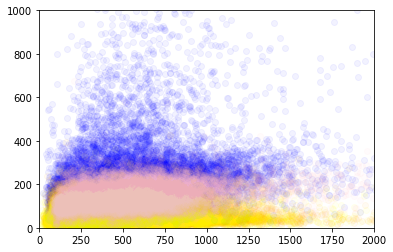

(0.2590935812361688, 0.0)
(0.05580636538164317, 1.0946556484753994e-23)
(0.08669473800846478, 4.051267419471835e-37)
(0.3107721450122778, 0.0)
***********
Korrelation Textlänge, normierte Aufenthaltsdauer


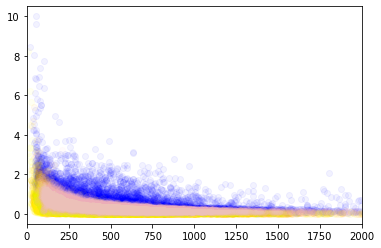

(-0.2854218590636658, 0.0)
(-0.46144131401167543, 0.0)
(-0.43391929395951084, 0.0)
(-0.6323691033634604, 0.0)
***********
Korrelation Textlänge, normierte Aufenthaltsdauer in Perzentilen


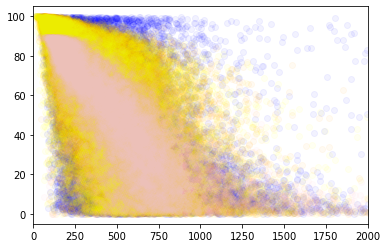

(-0.3879400375133261, 0.0)
(-0.5995601573410729, 0.0)
(-0.5645123485961412, 0.0)
(-0.7312672495770556, 0.0)


In [27]:
print("Korrelation Textlänge, Aufenthaltsdauer")
plt.scatter(NOZ.nr_tokens_text, NOZ.avgTimeOnPage, alpha = 0.05, color = "blue")
plt.scatter(SZ.nr_tokens_text, SZ.avgTimeOnPage, alpha = 0.05, color = "orange")
plt.scatter(TV.nr_tokens_text, TV.avgTimeOnPage, alpha = 0.05, color = "yellow")
plt.scatter(bonn.nr_tokens_text, bonn.avgTimeOnPage, alpha = 0.05, color = "pink")


plt.xlim(0, 2000)
plt.ylim(0, 1000)
plt.show()

print(st.pearsonr(NOZ.nr_tokens_text, NOZ.avgTimeOnPage))
print(st.pearsonr(SZ.nr_tokens_text, SZ.avgTimeOnPage))
print(st.pearsonr(TV.nr_tokens_text, TV.avgTimeOnPage))
print(st.pearsonr(bonn.nr_tokens_text, bonn.avgTimeOnPage))


print("***********")
print("Korrelation Textlänge, normierte Aufenthaltsdauer")
plt.scatter(NOZ.nr_tokens_text, NOZ.avgTimeOnPagePerWordcount, alpha = 0.05, color = "blue")
plt.scatter(SZ.nr_tokens_text, SZ.avgTimeOnPagePerWordcount, alpha = 0.05, color = "orange")
plt.scatter(TV.nr_tokens_text, TV.avgTimeOnPagePerWordcount, alpha = 0.05, color = "yellow")
plt.scatter(bonn.nr_tokens_text, bonn.avgTimeOnPagePerWordcount, alpha = 0.05, color = "pink")

plt.xlim(0, 2000)

plt.show()

print(st.pearsonr(NOZ.nr_tokens_text, NOZ.avgTimeOnPagePerWordcount))
print(st.pearsonr(SZ.nr_tokens_text, SZ.avgTimeOnPagePerWordcount))
print(st.pearsonr(TV.nr_tokens_text, TV.avgTimeOnPagePerWordcount))
print(st.pearsonr(bonn.nr_tokens_text, bonn.avgTimeOnPagePerWordcount))


print("***********")
print("Korrelation Textlänge, normierte Aufenthaltsdauer in Perzentilen")
plt.scatter(NOZ.nr_tokens_text, NOZ.avgTimeOnPagePerWordcount_percentile, alpha = 0.05, color = "blue")
plt.scatter(SZ.nr_tokens_text, SZ.avgTimeOnPagePerWordcount_percentile, alpha = 0.05, color = "orange")
plt.scatter(TV.nr_tokens_text, TV.avgTimeOnPagePerWordcount_percentile, alpha = 0.05, color = "yellow")
plt.scatter(bonn.nr_tokens_text, bonn.avgTimeOnPagePerWordcount_percentile, alpha = 0.05, color = "pink")

plt.xlim(0, 2000)

plt.show()

print(st.pearsonr(NOZ.nr_tokens_text, NOZ.avgTimeOnPagePerWordcount_percentile))
print(st.pearsonr(SZ.nr_tokens_text, SZ.avgTimeOnPagePerWordcount_percentile))
print(st.pearsonr(TV.nr_tokens_text, TV.avgTimeOnPagePerWordcount_percentile))
print(st.pearsonr(bonn.nr_tokens_text, bonn.avgTimeOnPagePerWordcount_percentile))

In [20]:
## warum korreliert die Aufenthaltsdauer bei NOZ und bonn (vernünftigerweise) mit der Textlänge, beim Rest aber nicht!

Korrelation Textlänge, Aufenthaltsdauer


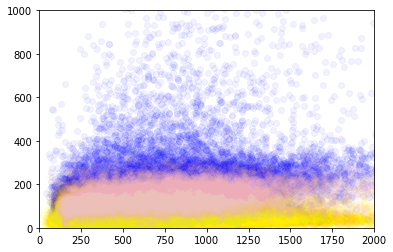

(0.2400183256910195, 0.0)
(0.03397757834364169, 1.0254512486960701e-09)
(0.06026165357757873, 9.596943256943842e-19)
(0.29263221894348984, 0.0)


In [28]:
print("Korrelation Textlänge, Aufenthaltsdauer")
plt.scatter(NOZ.nr_tokens_text_BERT, NOZ.avgTimeOnPage, alpha = 0.05, color = "blue")
plt.scatter(SZ.nr_tokens_text_BERT, SZ.avgTimeOnPage, alpha = 0.05, color = "orange")
plt.scatter(TV.nr_tokens_text_BERT, TV.avgTimeOnPage, alpha = 0.05, color = "yellow")
plt.scatter(bonn.nr_tokens_text_BERT, bonn.avgTimeOnPage, alpha = 0.05, color = "pink")


plt.xlim(0, 2000)
plt.ylim(0, 1000)
plt.show()

print(st.pearsonr(NOZ.nr_tokens_text_BERT, NOZ.avgTimeOnPage))
print(st.pearsonr(SZ.nr_tokens_text_BERT, SZ.avgTimeOnPage))
print(st.pearsonr(TV.nr_tokens_text_BERT, TV.avgTimeOnPage))
print(st.pearsonr(bonn.nr_tokens_text_BERT, bonn.avgTimeOnPage))

Korrelation Textlänge, BERT-Tokenzahl


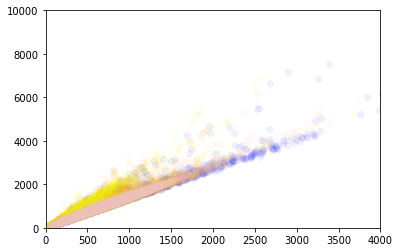

(0.9945478675746154, 0.0)
(0.9749696452580059, 0.0)
(0.9624809677431276, 0.0)
(0.9860355433110264, 0.0)


In [33]:
print("Korrelation Textlänge, BERT-Tokenzahl") # sollte ganz doll korrellieren
plt.scatter(NOZ.nr_tokens_text, NOZ.nr_tokens_text_BERT, alpha = 0.05, color = "blue")
plt.scatter(SZ.nr_tokens_text, SZ.nr_tokens_text_BERT, alpha = 0.05, color = "orange")
plt.scatter(TV.nr_tokens_text, TV.nr_tokens_text_BERT, alpha = 0.05, color = "yellow")
plt.scatter(bonn.nr_tokens_text, bonn.nr_tokens_text_BERT, alpha = 0.05, color = "pink")

plt.xlim(0, 4000)
plt.ylim(0, 10000)
plt.show()

print(st.pearsonr(NOZ.nr_tokens_text, NOZ.nr_tokens_text_BERT))
print(st.pearsonr(SZ.nr_tokens_text, SZ.nr_tokens_text_BERT))
print(st.pearsonr(TV.nr_tokens_text, TV.nr_tokens_text_BERT))
print(st.pearsonr(bonn.nr_tokens_text, bonn.nr_tokens_text_BERT))

In [34]:
print(NOZ.avgTimeOnPage.describe())
print(SZ.avgTimeOnPage.describe())
print(TV.avgTimeOnPage.describe())
print(bonn.avgTimeOnPage.describe())

count    36383.000000
mean       185.850687
std        131.640755
min          5.333333
25%        125.937526
50%        164.763191
75%        209.312263
max       3761.362903
Name: avgTimeOnPage, dtype: float64
count    32272.000000
mean        57.201894
std         40.984269
min          0.071429
25%         29.237874
50%         42.382198
75%         72.289073
max        425.672897
Name: avgTimeOnPage, dtype: float64
count    21481.000000
mean        51.346722
std         36.765179
min          0.760956
25%         27.186632
50%         41.567010
75%         63.714976
max        362.509091
Name: avgTimeOnPage, dtype: float64
count    17023.000000
mean       148.985371
std         51.886700
min          0.352273
25%        113.681252
50%        144.844186
75%        179.797540
max        674.200000
Name: avgTimeOnPage, dtype: float64


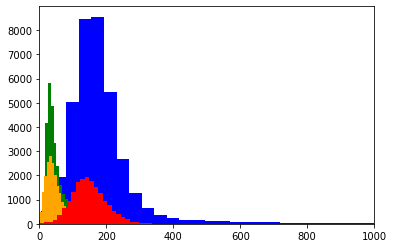

In [35]:
plt.hist(NOZ.avgTimeOnPage, 100, color = "blue")
plt.hist(SZ.avgTimeOnPage, 50, color = "green")
plt.hist(TV.avgTimeOnPage, 50, color = "orange")
plt.hist(bonn.avgTimeOnPage, 50, color = "red")
plt.xlim(0, 1000)
plt.show()

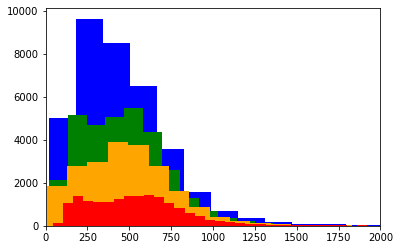

In [47]:
plt.hist(NOZ.nr_tokens_text, 300, color = "blue")
plt.hist(SZ.nr_tokens_text, 50, color = "green")
plt.hist(TV.nr_tokens_text, 100, color = "orange")
plt.hist(bonn.nr_tokens_text, 100, color = "red")
plt.xlim(0, 2000)
plt.show()

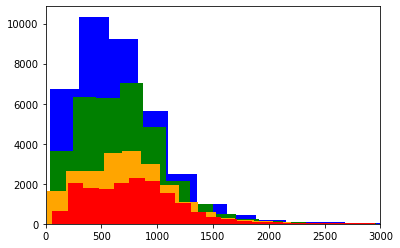

In [49]:
plt.hist(NOZ.nr_tokens_text_BERT, 300, color = "blue")
plt.hist(SZ.nr_tokens_text_BERT, 50, color = "green")
plt.hist(TV.nr_tokens_text_BERT, 100, color = "orange")
plt.hist(bonn.nr_tokens_text_BERT, 100, color = "red")
plt.xlim(0, 3000)
plt.show()

(0.0, 3000.0)

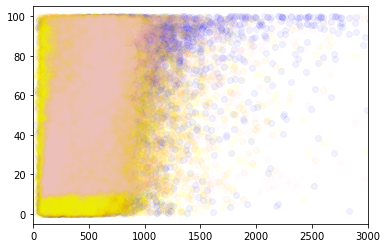

In [44]:
plt.scatter(NOZ.nr_tokens_text, NOZ.avgTimeOnPage_percentile, alpha = 0.05, color = "blue")
plt.scatter(SZ.nr_tokens_text, SZ.avgTimeOnPage_percentile, alpha = 0.05, color = "orange")
plt.scatter(TV.nr_tokens_text, TV.avgTimeOnPage_percentile, alpha = 0.05, color = "yellow")
plt.scatter(bonn.nr_tokens_text, bonn.avgTimeOnPage_percentile, alpha = 0.05, color = "pink")

plt.xlim(0, 3000)
#plt.ylim(0, 1000)

In [50]:
for name, df in {"NOZ": NOZ, "SZ": SZ, "TV": TV, "bonn": bonn}.items():
    print(name)
    for mi, ma in [(0, 200), (200, 400), (400, 600), (600, 800), (800, 1000), 
                   (1000, 1200), (1200, 1400), (1400, 1600), (1600, 1800), (1800, 2000),
                   (2000, 2200), (2200, 2400), (2400, 2600), (2600, 2800), (2800, 3000)]:
        tmp = df
        tmp = tmp[tmp.nr_tokens_text >= int(mi)]
        tmp = tmp[tmp.nr_tokens_text < int(ma)]
        if len(tmp)>0:
            print(f"von {mi} bis {ma} Wörter, ({len(tmp)} Artikel):", np.mean(tmp.avgTimeOnPage).round(2))
        
        
## hier sieht man das auch, dass bei NOZ und vonn die Dauer tendenziell steigt, bei den anderen nicht

NOZ
von 0 bis 200 Wörter, (6214 Artikel): 127.52
von 200 bis 400 Wörter, (11466 Artikel): 158.31
von 400 bis 600 Wörter, (9706 Artikel): 193.1
von 600 bis 800 Wörter, (5437 Artikel): 225.99
von 800 bis 1000 Wörter, (2045 Artikel): 256.0
von 1000 bis 1200 Wörter, (776 Artikel): 279.25
von 1200 bis 1400 Wörter, (322 Artikel): 325.72
von 1400 bis 1600 Wörter, (141 Artikel): 350.24
von 1600 bis 1800 Wörter, (77 Artikel): 429.2
von 1800 bis 2000 Wörter, (53 Artikel): 644.57
von 2000 bis 2200 Wörter, (30 Artikel): 464.92
von 2200 bis 2400 Wörter, (32 Artikel): 719.9
von 2400 bis 2600 Wörter, (29 Artikel): 712.63
von 2600 bis 2800 Wörter, (19 Artikel): 740.75
von 2800 bis 3000 Wörter, (9 Artikel): 403.41
SZ
von 0 bis 200 Wörter, (5297 Artikel): 55.0
von 200 bis 400 Wörter, (8477 Artikel): 55.43
von 400 bis 600 Wörter, (9524 Artikel): 56.74
von 600 bis 800 Wörter, (6027 Artikel): 59.95
von 800 bis 1000 Wörter, (1937 Artikel): 61.37
von 1000 bis 1200 Wörter, (627 Artikel): 62.89
von 1200 bis 14

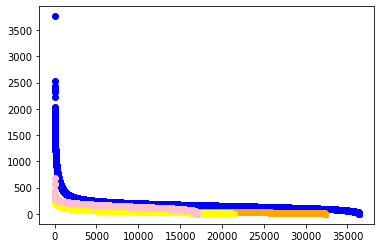

In [46]:
plt.scatter(range(len(NOZ)), NOZ.sort_values("avgTimeOnPage", ascending= False).avgTimeOnPage, color = "blue")
plt.scatter(range(len(SZ)), SZ.sort_values("avgTimeOnPage", ascending= False).avgTimeOnPage, color = "orange")
plt.scatter(range(len(TV)), TV.sort_values("avgTimeOnPage", ascending= False).avgTimeOnPage, color = "yellow")
plt.scatter(range(len(bonn)), bonn.sort_values("avgTimeOnPage", ascending= False).avgTimeOnPage, color = "pink")

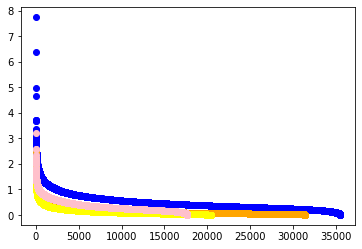

In [36]:
plt.scatter(range(len(NOZ)), NOZ.sort_values("avgTimeOnPagePerWordcount", ascending= False).avgTimeOnPagePerWordcount, color = "blue")
plt.scatter(range(len(SZ)), SZ.sort_values("avgTimeOnPagePerWordcount", ascending= False).avgTimeOnPagePerWordcount, color = "orange")
plt.scatter(range(len(TV)), TV.sort_values("avgTimeOnPagePerWordcount", ascending= False).avgTimeOnPagePerWordcount, color = "yellow")
plt.scatter(range(len(bonn)), bonn.sort_values("avgTimeOnPagePerWordcount", ascending= False).avgTimeOnPagePerWordcount, color = "pink")


In [37]:
NOZ.sort_values(by="avgTimeOnPage", ascending=False).head(20)

pageviews  exits  entrances  bounces  timeOnPage  \
articleId                                                       
NOZ_406939        1522   1398       1407      468    466409.0   
NOZ_739925         830    767        768      458    158771.0   
NOZ_448761        2157   2059       2065      881    238203.0   
NOZ_515048        4623   4305       4331     1953    762153.0   
NOZ_88793         1399   1292       1296      685    252586.0   
NOZ_662811        1600   1495       1504      410    246521.0   
NOZ_214402         792    737        745      378    128076.0   
NOZ_585400        1497   1393       1397      677    231420.0   
NOZ_764710        2085   1940       1957      959    294270.0   
NOZ_608253        1320   1204       1211      389    233401.0   
NOZ_700997        2227   2119       2113      478    215092.0   
NOZ_682520        9253   8703       8776     2362   1088362.0   
NOZ_732671        5457   5115       5149     1537    667332.0   
NOZ_557391         597    541        546      316    108225.0   
NOZ_12850         1977   1826       1839      982    288708.0   
NOZ_399678        1192   1086       1084      579    199212.0   
NOZ_806039         520    469        472      158     95638.0   
NOZ_800903         751    692        699      303    110470.0   
NOZ_1604315        522    451        479      165    132018.0   
NOZ_761464        5258   4953       4976     1203    559730.0   

                         category         rubric  \
articleId                                          
NOZ_406939                lokales         lathen   
NOZ_739925   deutschland-und-welt         medien   
NOZ_448761                lokales     osnabrueck   
NOZ_515048   deutschland-und-welt         medien   
NOZ_88793    deutschland-und-welt         medien   
NOZ_662811   deutschland-und-welt         medien   
NOZ_214402   deutschland-und-welt         medien   
NOZ_585400   deutschland-und-welt  gut-zu-wissen   
NOZ_764710   deutschland-und-welt    vermischtes   
NOZ_608253                lokales      papenburg   
NOZ_700997   deutschland-und-welt  gut-zu-wissen   
NOZ_682520   deutschland-und-welt         medien   
NOZ_732671   deutschland-und-welt  gut-zu-wissen   
NOZ_557391   deutschland-und-welt         medien   
NOZ_12850    deutschland-und-welt         medien   
NOZ_399678                lokales     osnabrueck   
NOZ_806039                lokales     osnabrueck   
NOZ_800903   deutschland-und-welt         medien   
NOZ_1604315  deutschland-und-welt    vermischtes   
NOZ_761464   deutschland-und-welt  gut-zu-wissen   

                                                         title  date  \
articleId                                                              
NOZ_406939             ich-war-schon-auf-dem-weg-zur-gaskammer   NaN   
NOZ_739925           jorg-thadeusz-schwarzer-anzug-rote-socken   NaN   
NOZ_448761             zierfische-bringen-mehr-als-briefmarken   NaN   
NOZ_515048   farin-urlaub-mochte-kein-zwangswitziger-alter-...   NaN   
NOZ_88793    hundeprofi-martin-rutter-beantwortet-harte-gew...   NaN   
NOZ_662811   kandidat-bei-ard-quiz-gefragt-gejagt-ein-erfah...   NaN   
NOZ_214402          adele-neuhauser-dunkle-seiten-helle-seiten   NaN   
NOZ_585400   interview-so-kriege-ich-das-kind-weg-von-der-w...   NaN   
NOZ_764710   papis-loveday-im-interview-ich-fand-mich-nie-s...   NaN   
NOZ_608253   geburtiger-papenburger-im-stasi-gefangnis-gefo...   NaN   
NOZ_700997   wenn-eltern-sich-trennen-allein-mit-zwei-klein...   NaN   
NOZ_682520   shitstorm-nach-rosin-besuch-bei-beef-factory-i...   NaN   
NOZ_732671   geringes-selbstwertgefuhl-erhoht-das-risiko-fu...   NaN   
NOZ_557391   christian-grzimek-das-wilde-leben-meines-gross...   NaN   
NOZ_12850               gudrun-landgrebe-erdet-die-traumfrauen   NaN   
NOZ_399678               schwerer-ausstieg-aus-dem-hollenleben   NaN   
NOZ_806039   baby-blues-depression-eine-mutter-berichtet-wa...   NaN   
NOZ_800903      bettina-tietjen-hat-keine-angst-vor-dem-altern   NaN 

In [67]:
def show_ID(df, c_list, ID):
    print("ID:", ID)
    print("---")
    for c in c_list:
        if not isinstance(df.loc[ID, c], str):
            print(f"{c}:", round(df.loc[ID, c], 2))
        else:
            print(f"{c}:", df.loc[ID, c])
        print("---")
        
    #print("TITEL:", df.loc[ID, "titel"])
    #if df.publisher[0] in ["NOZ", "bonn"]:
    #    print("TEASER:", df.loc[ID, "teaser"])
    #    print("TEXT: \n", df.loc[ID, "article_body"])
    #else:
    #    print("TEXT: \n", df.loc[ID, "article_text"])

In [74]:
c_list = ['publisher', 'pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage',
          'category', 'rubric', 'title', 'language',
          'nr_tokens_text', 'nr_tokens_text_punct', 'nr_tokens_text_BERT', 
          'avgTimeOnPage', 'avgTimeOnPagePerWordcount',
          'titel_html', 'teaser', 'article_body', 
          #  'article_text',
          ]

In [72]:
NOZ.columns

Index(['pageviews', 'exits', 'entrances', 'bounces', 'timeOnPage', 'category',
       'rubric', 'title', 'date', 'titel', 'prozentDpa', 'prozentVerlag',
       'zeilen', 'pagePath', 'dpaGuid', 'article_text', 'titel_html',
       'other_content', 'teaser', 'article_body', 'avgTimeOnPage',
       'nr_tokens_text', 'avgTimeOnPagePerWordcount',
       'avgTimeOnPage_percentile', 'pageviews_percentile',
       'avgTimeOnPagePerWordcount_percentile', 'language',
       'nr_tokens_text_punct', 'nr_tokens_text_BERT', 'publisher',
       'nr_tokens_publisher'],
      dtype='object')

In [75]:
#ID = 'NOZ_2067692'
#ID = 'SZ_7152612'
#ID = 'TV_51593341'
#ID = 'TV_5769062' # komischerweise sehr lange Aufenthalt, dabei echt kurz und langweilig, kein Video
#ID = 'NOZ_88793'

ID = 'NOZ_2041250'
ID = 'NOZ_2030073'
ID = 'NOZ_557382'
ID = 'NOZ_585400'

#ID = np.random.choice(NOZ.index)
show_ID(df = NOZ, c_list = c_list, ID = ID)

ID: NOZ_585400
---
publisher: NOZ
---
pageviews: 1497
---
exits: 1393
---
entrances: 1397
---
bounces: 677
---
timeOnPage: 231420.0
---
category: deutschland-und-welt
---
rubric: gut-zu-wissen
---
title: interview-so-kriege-ich-das-kind-weg-von-der-windel
---
language: de
---
nr_tokens_text: 1767
---
nr_tokens_text_punct: 2013
---
nr_tokens_text_BERT: 2382
---
avgTimeOnPage: 2225.19
---
avgTimeOnPagePerWordcount: 1.26
---
titel_html: Töpfchenerziehung und Trainingswindeln: Interview: So kriege ich das Kind weg von der Windel
---
teaser: Osnabrück. Wann geht das Kind endlich aufs Töpfchen? Warum war in der DDR die „Töpfchenerziehung“ so beliebt? Und wieso verstecken sich manche Kinder, wenn sie ein „großes Geschäft“ erledigen wollen? Die Entwicklungspsychologin Bettina Lamm klärt im NOZ-Interview auf.
---
article_body: Bettina Lamm vertritt seit Oktober 2014 die Professur für Entwicklungspsychologie an der Universität Osnabrück und ist wissenschaftliche Mitarbeiterin am Institut für Psy

In [44]:
NOZ.loc['NOZ_585400']

pageviews                                                                            1497
exits                                                                                1393
entrances                                                                            1397
bounces                                                                               677
timeOnPage                                                                         231420
category                                                             deutschland-und-welt
rubric                                                                      gut-zu-wissen
title                                   interview-so-kriege-ich-das-kind-weg-von-der-w...
date                                                                                  NaN
titel                                   Töpfchenerziehung und Trainingswindeln: Interv...
prozentDpa                                                                            NaN
prozentVer

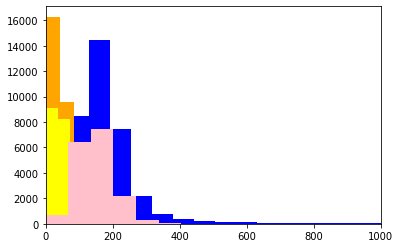

In [55]:
plt.hist(NOZ.avgTimeOnPage, color = "blue", bins = 60)
plt.hist(SZ.avgTimeOnPage, color = "orange")
plt.hist(TV.avgTimeOnPage, color = "yellow")
plt.hist(bonn.avgTimeOnPage, color = "pink")


plt.xlim(0, 1000)
plt.show()

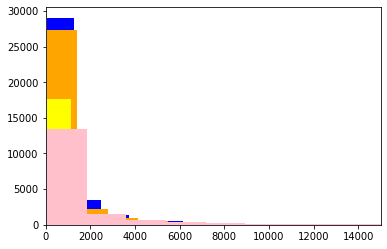

In [56]:
plt.hist(NOZ.pageviews, color = "blue", bins = 800)
plt.hist(SZ.pageviews, color = "orange", bins = 800)
plt.hist(TV.pageviews, color = "yellow", bins = 200)
plt.hist(bonn.pageviews, color = "pink", bins = 400)


plt.xlim(0, 15000)
plt.show()

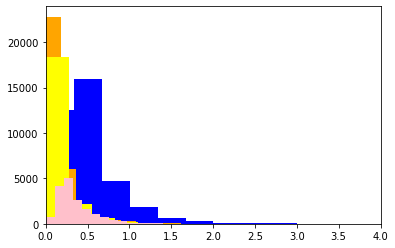

In [58]:
plt.hist(NOZ.avgTimeOnPagePerWordcount, color = "blue", bins = 30)
plt.hist(SZ.avgTimeOnPagePerWordcount, color = "orange", bins = 30)
plt.hist(TV.avgTimeOnPagePerWordcount, color = "yellow", bins = 30)
plt.hist(bonn.avgTimeOnPagePerWordcount, color = "pink", bins = 30)


plt.xlim(0, 4)
plt.show()

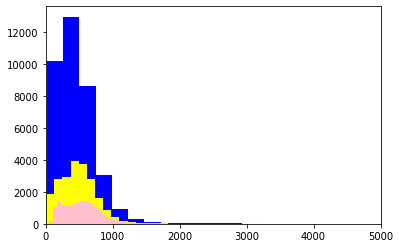

In [68]:
plt.hist(NOZ.nr_tokens_text, color = "blue", bins = 200)
plt.hist(SZ.nr_tokens_text, color = "orange", bins = 100)
plt.hist(TV.nr_tokens_text, color = "yellow", bins = 100)
plt.hist(bonn.nr_tokens_text, color = "pink", bins = 100)


plt.xlim(0, 5000)
plt.show()

## inspecting NOZ and bonn in detail

In [57]:
NOZ = utils.get_publisher_df("NOZ")
bonn = utils.get_publisher_df("bonn")

Shape of df: (36383, 31)
Shape of df: (17023, 31)


In [108]:
#NOZ.sort_values("nr_tokens_text", ascending = False).head()

In [109]:
#full.loc["NOZ_628776", "article_text"]

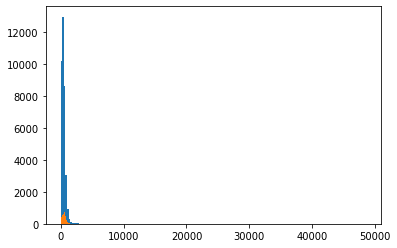

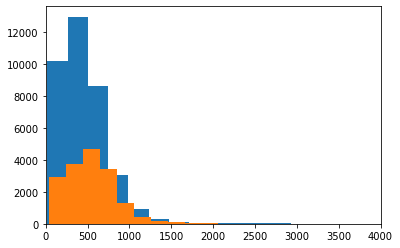

In [58]:
plt.hist(NOZ.nr_tokens_text, 200)
plt.hist(bonn.nr_tokens_text, 200)

plt.show()

plt.hist(NOZ.nr_tokens_text, 200)
plt.hist(bonn.nr_tokens_text, 30)

plt.xlim(0,4000)
plt.show()

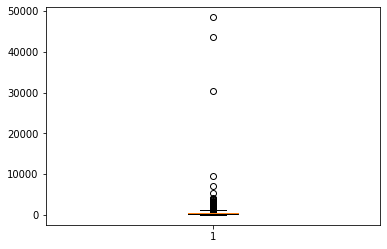

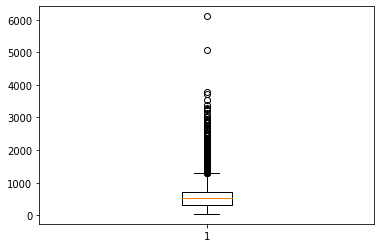

In [59]:
plt.boxplot(NOZ.nr_tokens_text)
plt.show()

plt.boxplot(bonn.nr_tokens_text)
plt.show()

In [60]:
NOZ.nr_tokens_text.describe()

count    36383.000000
mean       461.898139
std        481.948132
min         19.000000
25%        245.000000
50%        409.000000
75%        597.000000
max      48465.000000
Name: nr_tokens_text, dtype: float64

In [61]:
bonn.nr_tokens_text.describe()

count    17023.000000
mean       551.248605
std        323.327780
min         42.000000
25%        312.000000
50%        526.000000
75%        711.000000
max       6105.000000
Name: nr_tokens_text, dtype: float64

In [64]:
NOZ.nr_tokens_text_BERT.describe()

count    36383.000000
mean       674.686474
std        734.366470
min         39.000000
25%        358.000000
50%        597.000000
75%        867.000000
max      79296.000000
Name: nr_tokens_text_BERT, dtype: float64

In [63]:
bonn.nr_tokens_text_BERT.describe()

count    17023.000000
mean       800.611878
std        485.091317
min         62.000000
25%        454.000000
50%        762.000000
75%       1031.000000
max      13821.000000
Name: nr_tokens_text_BERT, dtype: float64

In [32]:
print(NOZ.nr_tokens_text[:10])
print(utils.z_transform(NOZ.nr_tokens_text)[:10])
print(np.log(NOZ.nr_tokens_text)[:10])

articleId
NOZ_1210     519
NOZ_1248     955
NOZ_2250     553
NOZ_2630     572
NOZ_2750    1323
NOZ_4542     582
NOZ_5154     480
NOZ_5420    1206
NOZ_6055     322
NOZ_6736     779
Name: nr_tokens_text, dtype: int64
articleId
NOZ_1210    0.118483
NOZ_1248    1.023157
NOZ_2250    0.189031
NOZ_2630    0.228455
NOZ_2750    1.786735
NOZ_4542    0.249204
NOZ_5154    0.037560
NOZ_5420    1.543967
NOZ_6055   -0.290280
NOZ_6736    0.657968
Name: nr_tokens_text, dtype: float64
articleId
NOZ_1210    6.251904
NOZ_1248    6.861711
NOZ_2250    6.315358
NOZ_2630    6.349139
NOZ_2750    7.187657
NOZ_4542    6.366470
NOZ_5154    6.173786
NOZ_5420    7.095064
NOZ_6055    5.774552
NOZ_6736    6.658011
Name: nr_tokens_text, dtype: float64


(-5.0, 5.0)

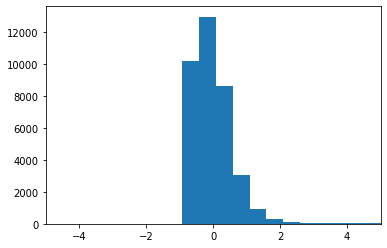

In [23]:
plt.hist(utils.z_transform(NOZ.nr_tokens_text), 200)
plt.xlim(-5,5)

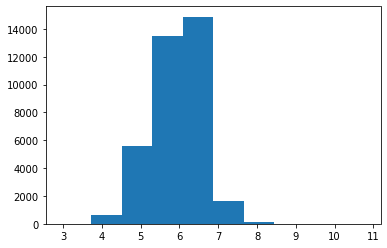

In [33]:
plt.hist(np.log(NOZ.nr_tokens_text))
plt.show()

In [65]:
print(len(NOZ[NOZ.nr_tokens_text < 3000]))
print(len(NOZ[NOZ.nr_tokens_text >= 3000]))
print(len(NOZ[NOZ.nr_tokens_text >= 5000]))
print(len(NOZ[NOZ.nr_tokens_text >= 10000]))

36356
27
6
3


In [66]:
print(len(bonn[bonn.nr_tokens_text < 3000]))
print(len(bonn[bonn.nr_tokens_text >= 3000]))
print(len(bonn[bonn.nr_tokens_text >= 5000]))
print(len(bonn[bonn.nr_tokens_text >= 10000]))

17011
12
2
0


In [41]:
print(len(NOZ[NOZ.nr_tokens_text < 1908]))
print(len(NOZ[NOZ.nr_tokens_text >= 1908]))

36218
165


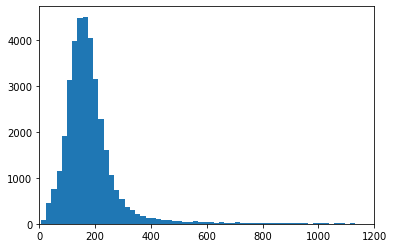

In [67]:
plt.hist(NOZ.avgTimeOnPage, 200)
plt.xlim(0, 1200)
plt.show()

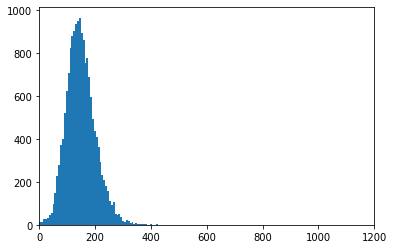

In [68]:
plt.hist(bonn.avgTimeOnPage, 100)
plt.xlim(0, 1200)
plt.show()

In [69]:
print(len(NOZ[NOZ.avgTimeOnPage <= 1200]))
print(len(NOZ[NOZ.avgTimeOnPage >= 1200]))
print(len(NOZ[NOZ.avgTimeOnPage >= 2000]))
print(len(NOZ[NOZ.avgTimeOnPage >= 3000]))

36279
104
10
1


In [70]:
NOZ = utils.get_publisher_df("NOZ")

nr_std = 3
print(nr_std)

for c in ["nr_tokens_text", "avgTimeOnPage", "avgTimeOnPagePerWordcount"]:
    print(c)
    #lower = np.mean(NOZ[c]) - nr_std*(np.std(NOZ[c])).round(3)
    #if lower <0:
    #    lower = 0
    upper = np.mean(NOZ[c]) + nr_std*(np.std(NOZ[c])).round(3)
    #print("lower:", lower)
    print("upper:", upper)


Shape of df: (36383, 31)
3
nr_tokens_text
upper: 1907.7241392408541
avgTimeOnPage
upper: 580.7676872485657
avgTimeOnPagePerWordcount
upper: 1.6950820365208192


In [62]:
bonn = utils.get_publisher_df("bonn")

nr_std = 3
print(nr_std)

for c in ["nr_tokens_text", "avgTimeOnPage", "avgTimeOnPagePerWordcount"]:
    print(c)
    #lower = np.mean(bonn[c]) - nr_std*(np.std(bonn[c])).round(3)
    #if lower <0:
    #    lower = 0
    upper = np.mean(bonn[c]) + nr_std*(np.std(bonn[c])).round(3)
    #print("lower:", lower)
    print("upper:", upper)



Shape of df: (17793, 28)
3
nr_tokens_text
upper: 1532.421955150902
avgTimeOnPage
upper: 304.91159582888486
avgTimeOnPagePerWordcount
upper: 1.0850210743113382


In [103]:
NOZ = utils.get_publisher_df("NOZ")

NOZ = NOZ[NOZ.nr_tokens_text >= 100]
NOZ = NOZ[NOZ.nr_tokens_text <= 1908]

NOZ = NOZ[NOZ.avgTimeOnPage >= 5]
NOZ = NOZ[NOZ.avgTimeOnPage <= 581]

NOZ = NOZ[NOZ.avgTimeOnPagePerWordcount >= 0.01]
NOZ = NOZ[NOZ.avgTimeOnPagePerWordcount <= 1.696]

print(NOZ.shape)

Shape of df: (36383, 28)
(34533, 28)


In [104]:
NOZ.avgTimeOnPagePerWordcount.describe().round(3)

count    34533.000
mean         0.470
std          0.265
min          0.011
25%          0.290
50%          0.401
75%          0.583
max          1.695
Name: avgTimeOnPagePerWordcount, dtype: float64

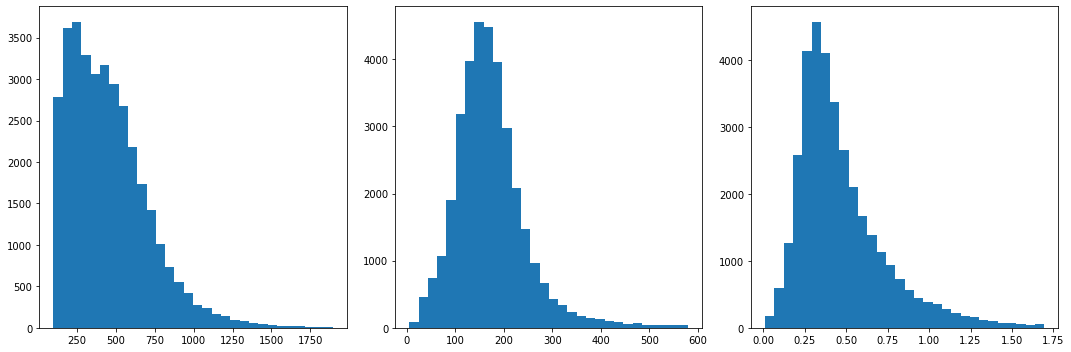

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].hist(NOZ.nr_tokens_text, 30)
axes[1].hist(NOZ.avgTimeOnPage, 30)
axes[2].hist(NOZ.avgTimeOnPagePerWordcount, 30)

fig.tight_layout()


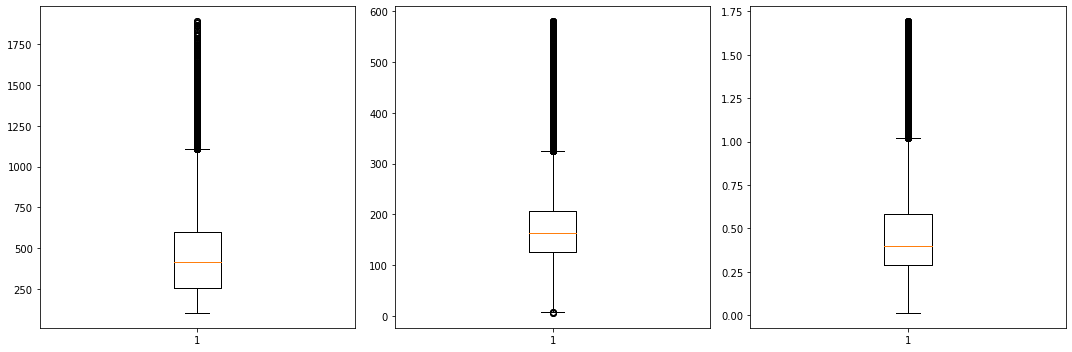

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].boxplot(NOZ.nr_tokens_text)
axes[1].boxplot(NOZ.avgTimeOnPage)
axes[2].boxplot(NOZ.avgTimeOnPagePerWordcount)

fig.tight_layout()

In [103]:
#NOZ[NOZ.avgTimeOnPagePerWordcount <= 1].sort_values(by="avgTimeOnPagePerWordcount", ascending = False)
NOZ[NOZ.avgTimeOnPagePerWordcount >= 3].sort_values(by="avgTimeOnPagePerWordcount", ascending = False)

pageviews  exits  entrances  bounces  timeOnPage  \
articleId                                                       
NOZ_1018152       1369   1267       1284      955     67560.0   
NOZ_947095        6037   5567       5600     3535    386607.0   
NOZ_585927         506    379        380      285    112104.0   
NOZ_656103        2638   2481       2491      918    160475.0   
NOZ_1591998       1214   1069        141       79     57087.0   
NOZ_625632        3708   3448       3463      743     98887.0   
NOZ_577184       11127  10241      10368     2306    536915.0   
NOZ_818037        4915   4372       4390     2090    379001.0   
NOZ_802133        1387   1250       1254      214     69138.0   

                         category         rubric  \
articleId                                          
NOZ_1018152               lokales     osnabrueck   
NOZ_947095   deutschland-und-welt         kultur   
NOZ_585927   deutschland-und-welt     wirtschaft   
NOZ_656103                  sport       fussball   
NOZ_1591998  deutschland-und-welt        politik   
NOZ_625632                lokales     osnabrueck   
NOZ_577184   deutschland-und-welt  gut-zu-wissen   
NOZ_818037                    NaN            NaN   
NOZ_802133   deutschland-und-welt  gut-zu-wissen   

                                                         title  date  \
articleId                                                              
NOZ_1018152  die-oscommunity-oder-erinnerungen-an-das-faceb...   NaN   
NOZ_947095                     was-macht-deutsche-kultur-aus-1   NaN   
NOZ_585927                       mogelpackung-elektromobilitat   NaN   
NOZ_656103   dfb-pokal-als-der-fc-bayern-gegen-sich-selbst-...   NaN   
NOZ_1591998                      hessen-schafft-todesstrafe-ab   NaN   
NOZ_625632              zwei-verletzte-bei-unfall-auf-der-a-30   NaN   
NOZ_577184   wann-muss-ich-ein-baby-nach-der-geburt-kranken...   NaN   
NOZ_818037   zwanzig-super-einfache-weihnachtskarten-zum-ba...   NaN   
NOZ_802133               krankenkasse-warnt-vor-betrugsanrufen   NaN   

                                                         titel  prozentDpa  \
articleId                                                                    
NOZ_1018152  Netzwerk ist offline: Die OScommunity, oder: E...         NaN   
NOZ_947095   Zehn Gedanken zu Deutschland: Was macht deutsc...         NaN   
NOZ_585927                       Mogelpackung Elektromobilität         NaN   
NOZ_656103   Achtelfinale vor 39 Jahren: DFB-Pokal: Als der...         NaN   
NOZ_1591998  Abstimmung über Verfassung: Hessen schafft Tod...         NaN   
NOZ_625632   Osnabrücker rammt Wagen: Zwei Verletzte bei Un...         NaN   
NOZ_577184   Krankenversicherung bei Babys: Wann muss ich e...         NaN   
NOZ_818037   Tipps für kreative Post: 15 super einfache Wei...         NaN   
NOZ_802133   Falsche AOK-Mitarbeiter: Krankenkasse warnt vo...         NaN   

             prozentVerlag  zeilen pagePath dpaGuid  \
articleId                                             
NOZ_1018152            NaN     NaN      NaN     NaN   
NOZ_947095             NaN     NaN      NaN     NaN   
NOZ_585927             NaN     NaN      NaN     NaN   
NOZ_656103             NaN     NaN      NaN     NaN   
NOZ_1591998            NaN     NaN      NaN     NaN   
NOZ_625632             NaN     NaN      NaN     NaN   
NOZ_577184             NaN     NaN      NaN     NaN   
NOZ_818037             NaN     NaN      NaN     NaN   
NOZ_802133             NaN     NaN      NaN     NaN   

                                                  article_text  \
articleId                                                        
NOZ_1018152  Netzwerk ist offline: Die OScommunity, oder: E...   
NOZ_947095   Zehn Gedanken zu Deutschland: Was macht deutsc...   
NOZ_585927   Mogelpackung Elektromobilität Osnabrück. Leise...   
NOZ_656103   Achtelfinale vor 39 Jahren: DFB-Pokal: Als der...   
NOZ_1591998  Abstimmung über Verfassung: Hessen schafft Tod...   
NOZ_

In [104]:
print(len(NOZ[NOZ.avgTimeOnPagePerWordcount < 1]))
print(len(NOZ[NOZ.avgTimeOnPagePerWordcount >= 1]))
print(len(NOZ[NOZ.avgTimeOnPagePerWordcount >= 2]))
print(len(NOZ[NOZ.avgTimeOnPagePerWordcount >= 3]))
print(len(NOZ[NOZ.avgTimeOnPagePerWordcount >= 4]))
print(len(NOZ[NOZ.avgTimeOnPagePerWordcount >= 5]))
print(len(NOZ[NOZ.avgTimeOnPagePerWordcount >= 6]))

21650
1496
85
9
3
1
1


In [16]:
#for n, ID in enumerate(NOZ[NOZ.avgTimeOnPagePerWordcount >= 3].index):
for n, ID in enumerate(bonn[bonn.avgTimeOnPagePerWordcount >= 2].index):

    print("NUMMER", n)
    show_ID(df = full, c_list = ["pageviews", "pageviews_percentile", "nr_tokens_text", "avgTimeOnPage", "avgTimeOnPage_percentile",
                                 "avgTimeOnPagePerWordcount"], ID = ID)

    print("----")

NUMMER 0
bonn_39966401
pageviews: 453
---
pageviews_percentile: 52.5
---
nr_tokens_text: 109
---
avgTimeOnPage: 220.13
---
avgTimeOnPage_percentile: 91.95
---
avgTimeOnPagePerWordcount: 2.02
---
TITEL: Wenn der Schalter knistert
TEXT: 
 Wenn der Schalter knistert Aus unserem Alltag ist er nicht mehr wegzudenken, aber wie funktioniert so ein Kippschalter eigentlich? Artikel eines Schülers der Gemeinschafts-Grundschule Heimerzheim, Klasse 4d. Swisttal. Es gibt verschiedene Stromschalter, aber am meisten benutzt man Kippschalter. Wenn man diese umlegt, legen sich zwei Drähte aufeinander, und der Stromkreis schließt sich. Wenn jemand aber den Schalter aus Versehen zu langsam umlegt, knistert er. Das liegt daran, dass der eine Draht nicht ganz auf dem anderen liegt, der Stromkreis also nicht ganz geschlossen ist. Die Lampe flackert. Das bitte aber nicht absichtlich nachmachen, denn der Schalter ist dann kaputt. Die Drähte sind nämlich verschmort. Swistbachschule Heimerzheim, Swisttal, Klass

In [59]:
## genauer die mit PerWordcount > 3 angeschaut
# NOZ_338904 alles richtig
# NOZ_547580 # hier fehlt der Kasten "Zur Sache" ...
# NOZ_577184 # stimmt alles, hat viele Links
# NOZ_585927 # stimmt alles
# NOZ_625632 # stimmt alles
# NOZ_656103 # stimmt alles
# NOZ_802133 # stimmt alles
# NOZ_1591998 # stimmt alles
# NOZ_818037 # Pinterest-Fotos im Text..
# NOZ_1018152 # hier fehlt ein Großteil des Textes, da der irgendwie anders formatiert ist... (nicht im html)
# ...
# NOZ_947095 # hier fehlt ein Großteil des Textes, da der irgendwie anders formatiert ist... (nicht im html)
# NOZ_1011726 # hier fehlt ein Großteil des Textes, da der irgendwie anders formatiert ist... (nicht im html)

In [106]:
utils.get_text("NOZ", "656103")

'Achtelfinale vor 39 Jahren: DFB-Pokal: Als der FC Bayern gegen sich selbst spielte Osnabrück. Heute vor 39 Jahren spielte der FC Bayern München im DFB-Pokal gegen sich selbst. Zumindest in gewisser Weise, denn die Begegnung im Achtelfinale lautete FC Bayern gegen FC Bayern Amateure. Eine Paarung, die heute nicht mehr möglich wäre. Das Spiel begann für die Profimannschaft um Franz Beckenbauer und Karl-Heinz Rummenigge denkbar schlecht: Die Amateure gingen mit 0:1 in Führung. Offenbar ein Weckruf für Gerd Müller, der dann innerhalb von zehn Minuten drei Tore schoss und den Spielstand auf ein zwischenzeitliches 3:1 korrigierte. Am Ende ging das Spiel 5:3 für die Profis aus – mit insgesamt vier Toren von Müller. Solche vereinsinternen Duelle blieben kein Einzelfall. In der Saison 1997/1998 beispielsweise warf die Profimannschaft von Kaiserslautern in der ersten Runde die eigene zweite Mannschaft mit 5:0 aus dem Pokal. In der Saison 2000/2001 machten die Profis vom VfB Stuttgart das Gleich

In [54]:
NOZ_extra = pd.read_csv('/home/ruecker/data/Daten_INWT/201117_dataNLP_NOZ/201117_NOZ_extra.txt', sep="\t", 
                        index_col="articleId")

In [55]:
NOZ_extra.head()

titel_html  \
articleId                                                        
NOZ_2020797  In Zeiten von Coronavirus: Strenge Hygiene und...   
NOZ_2122385  Endlich ein Lobbyregister: Vertrauen ist gut, ...   
NOZ_2005750  Warum Bergenien eine gute Wahl sind: Mit einem...   
NOZ_2067811  Serie: USA am Scheideweg?: Kann die Empathie e...   
NOZ_1528084  Ausverkauf läuft: TIWA-Markt in Bad Rothenfeld...   

                                                        teaser  \
articleId                                                        
NOZ_2020797  Aschendorf. Vor dem Amandushaus in Aschendorf ...   
NOZ_2122385  Osnabrück. Tausende Interessenvertreter versuc...   
NOZ_2005750  Osnabrück. In Omas Garten gehörten Bergenien m...   
NOZ_2067811  Osnabrück. Fünf Monate vor der Präsidentschaft...   
NOZ_1528084  Bad Rothenfelde. Der TIWA-Markt in Bad Rothenf...   

                                                  article_body  \
articleId                                                        
NOZ_2020797  "Waren Sie in letzter Zeit im Urlaub?", fragt ...   
NOZ_2122385  Das Lobbyregister für Bundestag und Bundesregi...   
NOZ_2005750  Das gibt es nicht nur im Garten: Alte Schätze ...   
NOZ_2067811  „Laut und ungestüm“ soll es zugehen auf den Wa...   
NOZ_1528084  Schon seit einigen Tagen schrumpfen die Lebens...   

                                                  full_article other_content  
articleId                                                                     
NOZ_2020797  In Zeiten von Coronavirus: Strenge Hygiene und...            no  
NOZ_2122385  Endlich ein Lobbyregister: Vertrauen ist gut, ...            no  
NOZ_2005750  Warum Bergenien eine gute Wahl sind: Mit einem...            no  
NOZ_2067811  Serie: USA am Scheideweg?: Kann die Empathie e...            no  
NOZ_1528084  Ausverkauf läuft: TIWA-Markt in Bad Rothenfeld...            no

In [56]:
NOZ_extra.shape

(45437, 5)

In [57]:
NOZ_extra['teaser'].isnull().sum()

451

In [58]:
NOZ_extra['titel_html'].isnull().sum()

0

In [59]:
NOZ_extra['other_content'].isnull().sum()

0

In [60]:
NOZ_extra['article_body'].isnull().sum()

140

In [61]:
with_nans = NOZ_extra[NOZ_extra.isna().any(axis=1)]
print(len(with_nans))

589


In [62]:
with_nans.head(15)

titel_html  \
articleId                                                        
NOZ_1332     Seit der Kindheit angefixt: Alexander Bommes b...   
NOZ_28373    Puschelige Larve, die Buchenblätter frisst, wi...   
NOZ_316217   Buche verliert 28 Kilo Laub: Papenburger Wisse...   
NOZ_75150    Spuk dauerte nur Sekunden: Als der Tornado in ...   
NOZ_46472    140 Gäste in der Gaststätte Rothert: Tradition...   
NOZ_47070    Firmengründer zog mit „Pott und Pinsel“ durch ...   
NOZ_1994096  Der Liveticker zum Nachlesen: Stadt Osnabrück ...   
NOZ_2113229  Liveticker zum Nachlesen: SV Meppen unterliegt...   
NOZ_39656    „Den eigenen Weg gehen“: Abiturienten in Handr...   
NOZ_1981928  Liveticker zum Nachlesen: SV Meppen verliert 0...   
NOZ_48183               Stadt bereitet Spedition Koch das Feld   
NOZ_49588    „In Betrieb hineingeboren“: Bramscher Wirtscha...   
NOZ_48326    Stadt reagiert auf VOS-Bitte: Jetzt doch Tempo...   
NOZ_261113   Distributionszentrum in Rieste: Adidas schafft...   
NOZ_48541    Brandstiftung: Georgsmarienhütte: Kunstrasenpl...   

                                                        teaser  \
articleId                                                        
NOZ_1332                                                   NaN   
NOZ_28373                                                  NaN   
NOZ_316217                                                 NaN   
NOZ_75150                                                  NaN   
NOZ_46472                                                  NaN   
NOZ_47070                                                  NaN   
NOZ_1994096  Osnabrück. Bei der Sitzung am Dienstagabend ha...   
NOZ_2113229  Herzlake. Der SV Meppen ist am Mittwoch auf ei...   
NOZ_39656                                                  NaN   
NOZ_1981928  Meppen. Das erste Spiel des Jahres hat der SV ...   
NOZ_48183                                                  NaN   
NOZ_49588                                                  NaN   
NOZ_48326                                                  NaN   
NOZ_261113                                                 NaN   
NOZ_48541                                                  NaN   

                                                  article_body  \
articleId                                                        
NOZ_1332     Herr Bommes, wenn ich mich richtig über Sie in...   
NOZ_28373    Welche Spezies schlüpft nach der Verpuppung he...   
NOZ_316217   Schaut man sich jedoch nur ansatzweise an, was...   
NOZ_75150    Doppeltes Glück hatte Jürgen Kaschner. Sein Ha...   
NOZ_46472    Bevor aber Kohl und Pinkel auf den Tellern lag...   
NOZ_47070    Viele Geschäftspartner, Freunde, Mitarbeiter u...   
NOZ_1994096                                                NaN   
NOZ_2113229                                                NaN   
NOZ_39656    Schulleiter Franz-Josef Hanneken sagte, dass n...   
NOZ_1981928                                                NaN   
NOZ_48183    In Betracht kommen die sogenannten GVZ-Flächen...   
NOZ_49588    Auch bei der Badewanne „könnte es schwierig we...   
NOZ_48326    Die Stadt GMHütte hat als zuständige Straßenve...   
NOZ_261113   Entsprechende Pläne bestätigte der Konzern ges...   
NOZ_48541    Wie die Polizei mitteilt, war auf dem Platz ei...   

                                                  full_article other_content  
articleId                                                                     
NOZ_1332     Seit der Kindheit angefixt: Alexander Bommes b...            no  
NOZ_28373    Puschelige Larve, die Buchenblätter frisst, wi...            no  
NOZ_316217   Buche verliert 28 Kilo Laub: Papenburger Wisse...            no  
NOZ_75150    Spuk dauerte nur Sekunden: Als der Tornado in ...            no  
NOZ_46472    140 Gäste in der Gaststätte Rothert: Tradition...            no  
NOZ_47070    Firmengründer zog mit „Pott und Pinsel“ durch ...            no  
NOZ_1994096  Der Liveticker zum Nachlesen: Stadt Os

In [63]:
print(len(NOZ_extra[NOZ_extra.teaser.isna()]))
print(len(NOZ_extra[NOZ_extra.article_body.isna()]))

451
140


In [65]:
print(len(set(NOZ.index).intersection(set(with_nans.index))))

# es betraf abe nur 181 der Artikel mit KPIs, dass sie keinen teaser oder Text haben --> wurden rausgeschmissen!

0


## Plotting

In [33]:
def hist_boxplot(variable, bins = 30):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
    fig.suptitle(f'{variable}')
    ax1.hist(full[variable], bins)
    ax1.set_title('full')
    ax2.hist(no_outliers[variable], bins)
    ax2.set_title('no_outliers')
    ax3.hist(min_diff[variable], bins)
    ax3.set_title('min_diff')
    ax4.hist(min_prozent[variable], bins)
    ax4.set_title('min_prozent')
    ax5.hist(df[variable], bins)
    ax5.set_title('df cond')
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
    fig.suptitle(f'{variable}')
    ax1.boxplot(full[variable])
    ax1.set_title('full')
    ax2.boxplot(no_outliers[variable])
    ax2.set_title('no_outliers')
    ax3.boxplot(min_diff[variable])
    ax3.set_title('min_diff')
    ax4.boxplot(min_prozent[variable])
    ax4.set_title('min_prozent')
    ax5.boxplot(df[variable])
    ax5.set_title('df cond')
    
    plt.show()

In [34]:
#hist_boxplot('pageviews-exits', bins = 60)

In [35]:
#hist_boxplot('zeilen')
#hist_boxplot('wordcount')

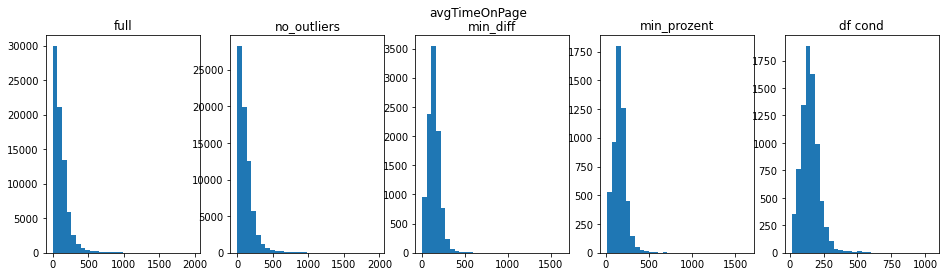

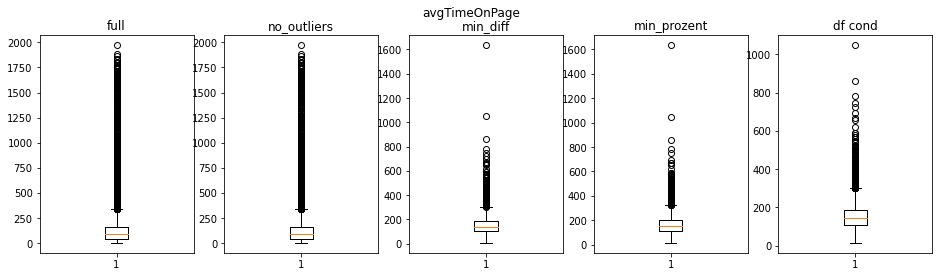

In [36]:
hist_boxplot('avgTimeOnPage')

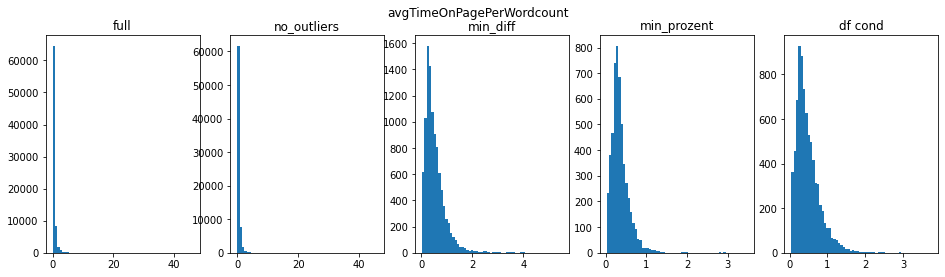

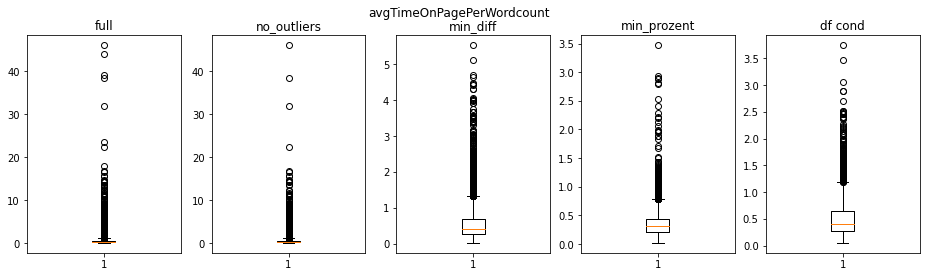

In [37]:
hist_boxplot('avgTimeOnPagePerWordcount', bins = 60)

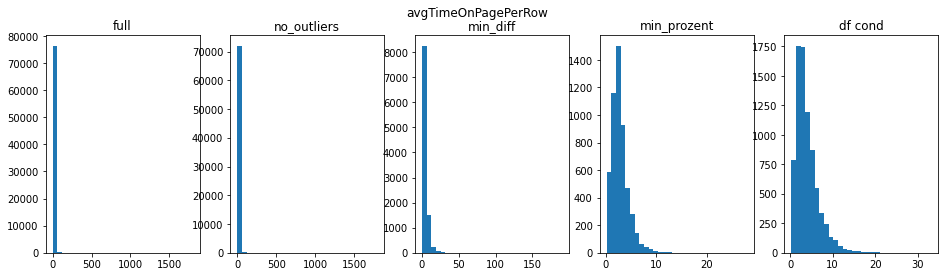

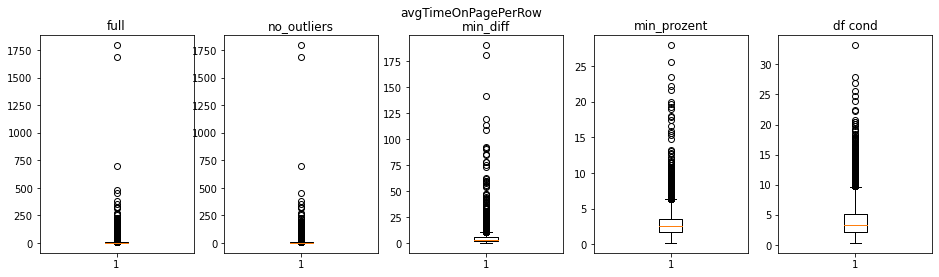

In [38]:
hist_boxplot('avgTimeOnPagePerRow')

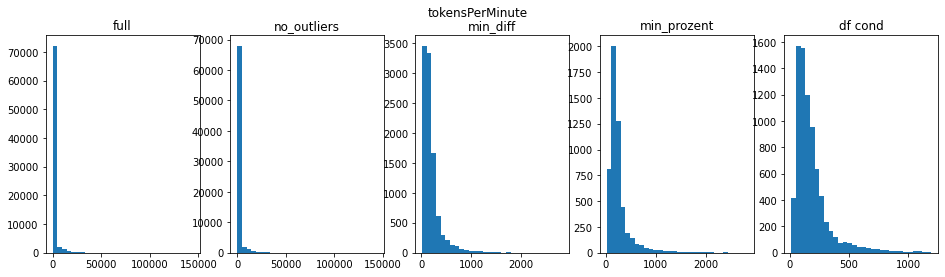

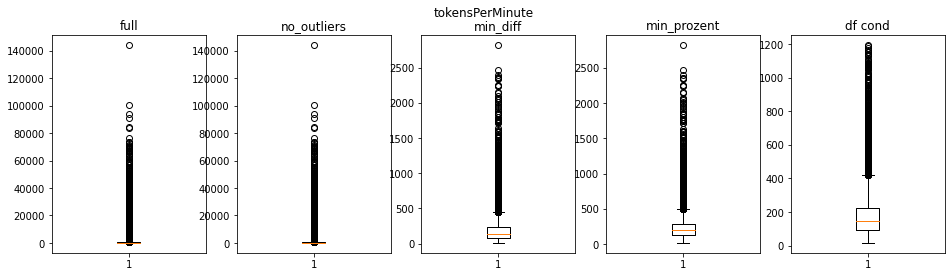

In [39]:
hist_boxplot('tokensPerMinute')
#hist_boxplot('tokensPerSecond')

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


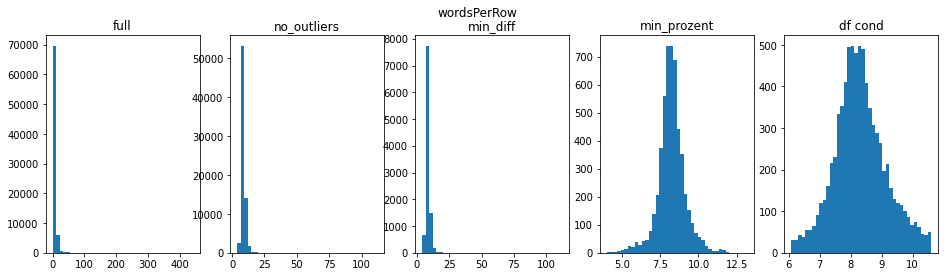

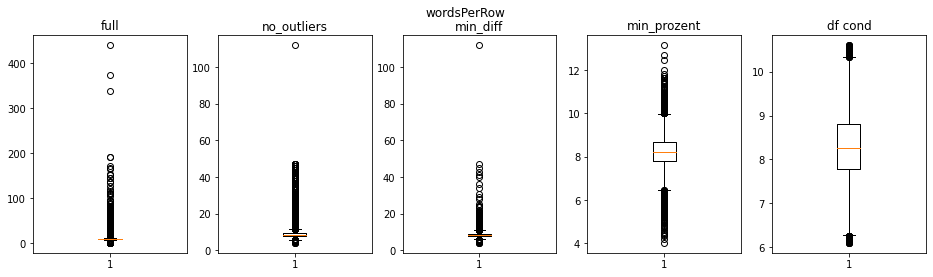

In [40]:
full['wordsPerRow'] = full.wordcount / full.zeilen
no_outliers['wordsPerRow'] = no_outliers.wordcount / no_outliers.zeilen
min_diff['wordsPerRow'] = min_diff.wordcount / min_diff.zeilen
min_prozent['wordsPerRow'] = min_prozent.wordcount / min_prozent.zeilen

hist_boxplot('wordsPerRow', 40)

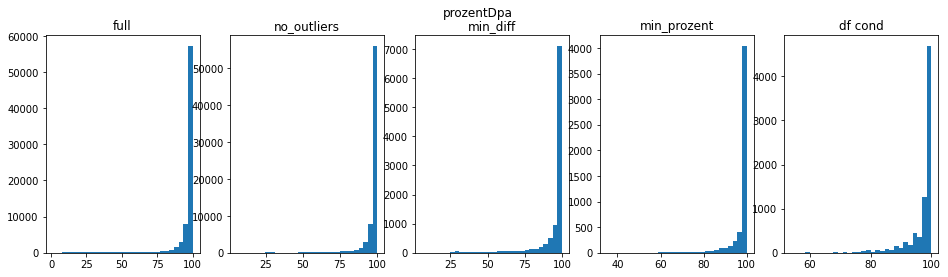

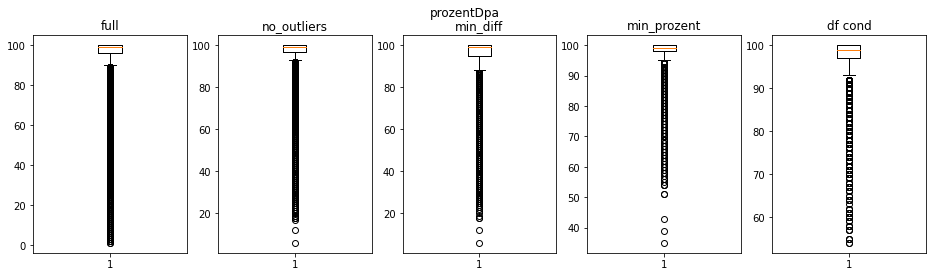

In [41]:
hist_boxplot('prozentDpa')
# Bedeutung: Wieviel Prozent des dpa-Textes ist in den Artikel eingeflossen?

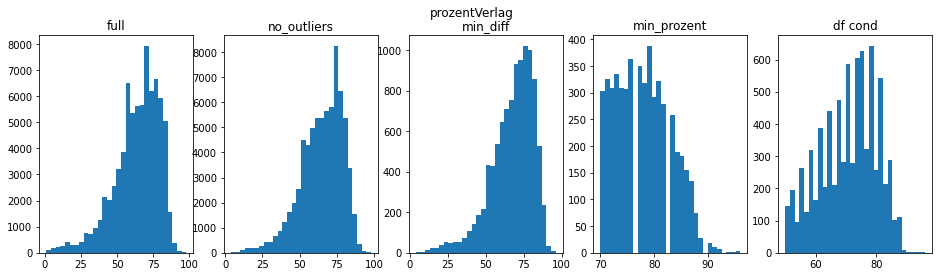

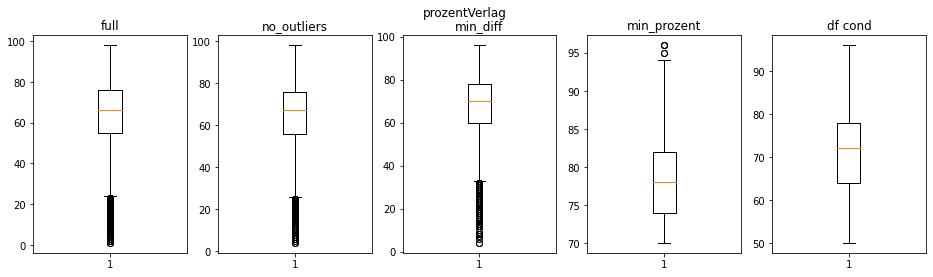

In [42]:
hist_boxplot('prozentVerlag')
# Bedeutung: zu wieviel Prozent besteht der Artikel aus dpa-Text?

In [43]:
#hist_boxplot('score_avgTimeOnPage')

In [44]:
def scatter(var1, var2, alpha = 0.02):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
    ax1.scatter(full[var1], full[var2], alpha = alpha)
    ax1.set_title('full')
    ax1.set_xlabel(var1)
    ax1.set_ylabel(var2)
    ax2.scatter(no_outliers[var1], no_outliers[var2], alpha = alpha)
    ax2.set_title('no_outliers')
    ax2.set_xlabel(var1)
    ax2.set_ylabel(var2)
    ax3.scatter(min_diff[var1], min_diff[var2], alpha = alpha)
    ax3.set_title('min_diff')
    ax3.set_xlabel(var1)
    ax3.set_ylabel(var2)
    ax4.scatter(min_prozent[var1], min_prozent[var2], alpha = alpha)
    ax4.set_title('min_prozent')
    ax4.set_xlabel(var1)
    ax4.set_ylabel(var2)
    ax5.scatter(df[var1], df[var2], alpha = alpha)
    ax5.set_title('df cond')
    ax5.set_xlabel(var1)
    ax5.set_ylabel(var2)
    
    plt.show()
    
    print("full:", st.pearsonr(full[var1], full[var2]))
    print("no_outliers:", st.pearsonr(no_outliers[var1], no_outliers[var2]))
    print("min_diff:", st.pearsonr(min_diff[var1], min_diff[var2]))
    print("min_prozent:", st.pearsonr(min_prozent[var1], min_prozent[var2]))
    print("df:", st.pearsonr(df[var1], df[var2]))
        

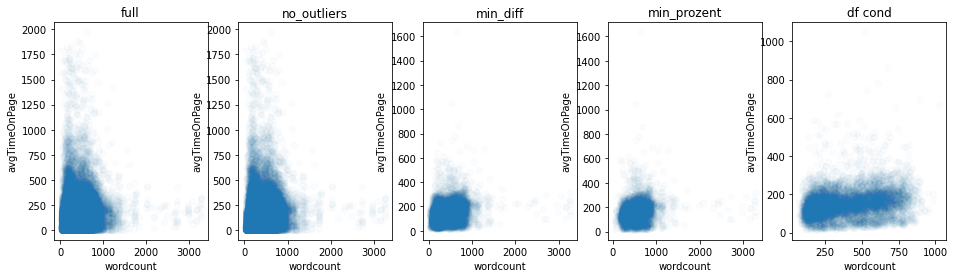

full: (0.18783602408669456, 0.0)
no_outliers: (0.19942966076685453, 0.0)
min_diff: (0.22693636138301326, 3.0049347288121296e-118)
min_prozent: (0.17155446895137488, 4.68638681434339e-36)
df: (0.22967704375151346, 4.2018637163680615e-95)


In [45]:
scatter('wordcount', 'avgTimeOnPage')

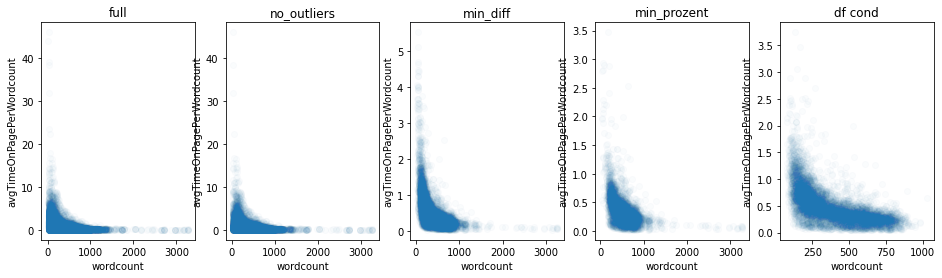

full: (-0.2468466933519962, 0.0)
no_outliers: (-0.2337181856662567, 0.0)
min_diff: (-0.5428093054799394, 0.0)
min_prozent: (-0.4708575212078582, 9.247227314454493e-289)
df: (-0.6211887000382036, 0.0)


In [46]:
scatter('wordcount', 'avgTimeOnPagePerWordcount')

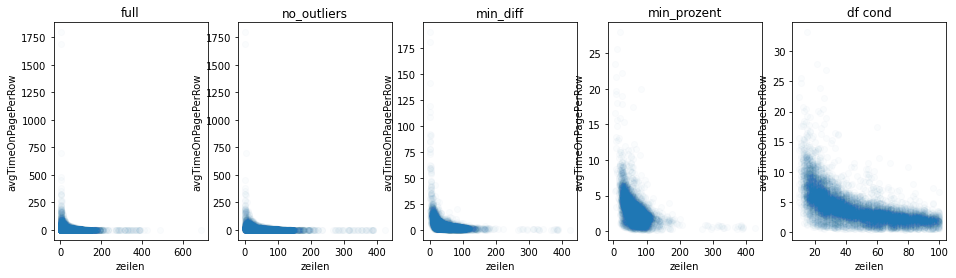

full: (-0.154660814597366, 0.0)
no_outliers: (-0.1462590029935615, 0.0)
min_diff: (-0.3909070013622023, 0.0)
min_prozent: (-0.46054614586887155, 9.755253926362229e-275)
df: (-0.6159992044022391, 0.0)


In [47]:
scatter('zeilen', 'avgTimeOnPagePerRow')

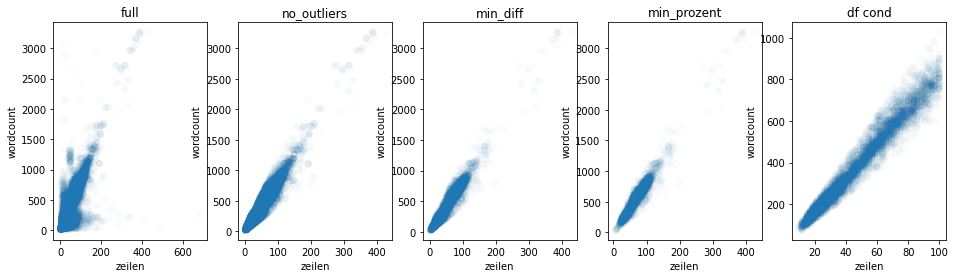

full: (0.9036112715788113, 0.0)
no_outliers: (0.9768537946579179, 0.0)
min_diff: (0.9742169097374107, 0.0)
min_prozent: (0.9725537026675937, 0.0)
df: (0.980522484876449, 0.0)


In [48]:
scatter('zeilen', 'wordcount')

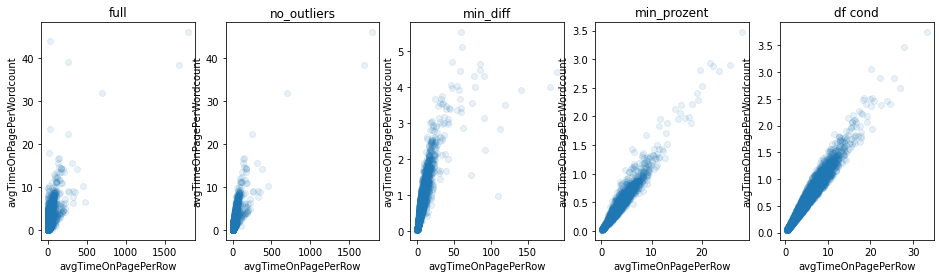

full: (0.7204801045063156, 0.0)
no_outliers: (0.7856955659360859, 0.0)
min_diff: (0.812399065443735, 0.0)
min_prozent: (0.9757734888997851, 0.0)
df: (0.9809742246710499, 0.0)


In [49]:
scatter('avgTimeOnPagePerRow', 'avgTimeOnPagePerWordcount', alpha = 0.1)

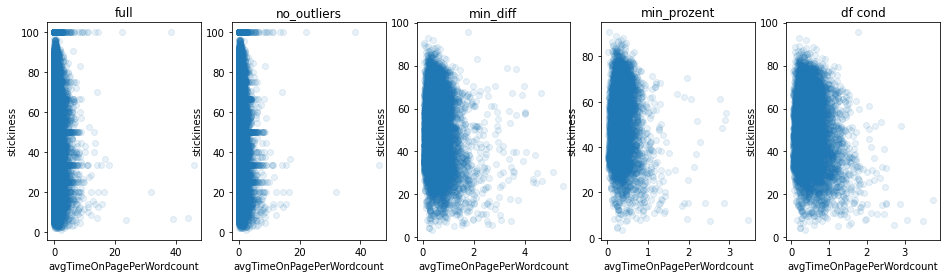

full: (-0.05174729402492004, 1.341140984809219e-46)
no_outliers: (-0.05141370765925284, 1.804903199002023e-43)
min_diff: (-0.2166849240323627, 9.94683893359191e-108)
min_prozent: (-0.16032176106542753, 1.2027683834200847e-31)
df: (-0.23700987875874932, 2.5185771140515402e-101)


In [50]:
scatter('avgTimeOnPagePerWordcount', 'stickiness', alpha = 0.1)

NOZ
bonn
aachener
SZ
TV
NOZ
bonn
aachener
SZ
TV


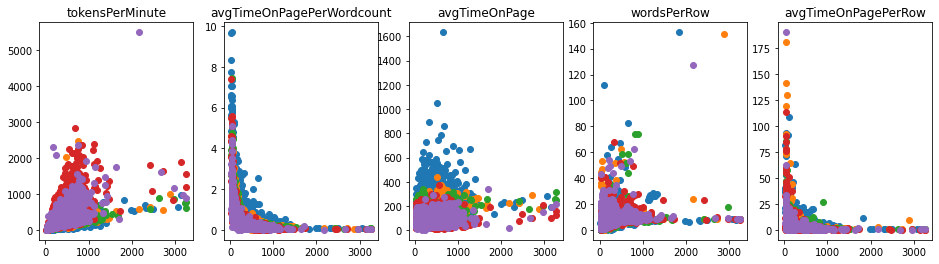

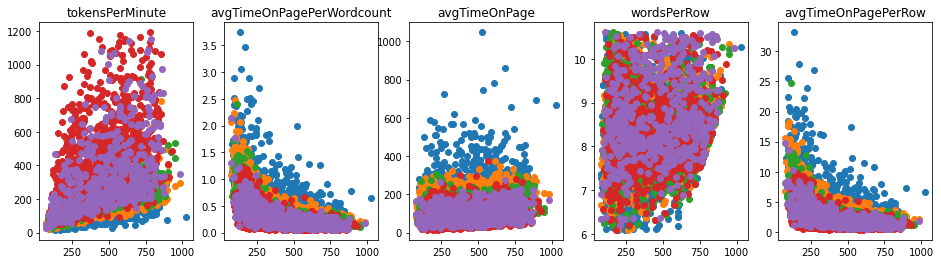

In [51]:
# warum sind da so seltsame Linien, häää?

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
for p in df.publisher.value_counts().keys():
    print(p)
    full_publ = full[full.publisher == p]
    full_publ = full_publ[(full_publ.pageviews - full_publ.exits) >= 50]
    #full_publ = full_publ[full_publ.ausreisser == 'nein']
    #full_publ = full_publ[full_publ.zeilen >= 20]

    #print(len(df_publ))
    ax1.scatter(full_publ.wordcount, full_publ.tokensPerMinute)
    ax1.set_title('tokensPerMinute')
    ax2.scatter(full_publ.wordcount, full_publ.avgTimeOnPagePerWordcount)
    ax2.set_title('avgTimeOnPagePerWordcount')
    ax3.scatter(full_publ.wordcount, full_publ.avgTimeOnPage)
    ax3.set_title('avgTimeOnPage')
    ax4.scatter(full_publ.wordcount, full_publ.wordsPerRow)
    ax4.set_title('wordsPerRow')
    ax5.scatter(full_publ.wordcount, full_publ.avgTimeOnPagePerRow)
    ax5.set_title('avgTimeOnPagePerRow')
    

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize= (16, 4))
for p in df.publisher.value_counts().keys():
    print(p)
    df_publ = df[df.publisher == p]

    #print(len(df_publ))
    ax1.scatter(df_publ.wordcount, df_publ.tokensPerMinute)
    ax1.set_title('tokensPerMinute')
    ax2.scatter(df_publ.wordcount, df_publ.avgTimeOnPagePerWordcount)
    ax2.set_title('avgTimeOnPagePerWordcount')
    ax3.scatter(df_publ.wordcount, df_publ.avgTimeOnPage)
    ax3.set_title('avgTimeOnPage')
    ax4.scatter(df_publ.wordcount, df_publ.wordsPerRow)
    ax4.set_title('wordsPerRow')
    ax5.scatter(df_publ.wordcount, df_publ.avgTimeOnPagePerRow)
    ax5.set_title('avgTimeOnPagePerRow')

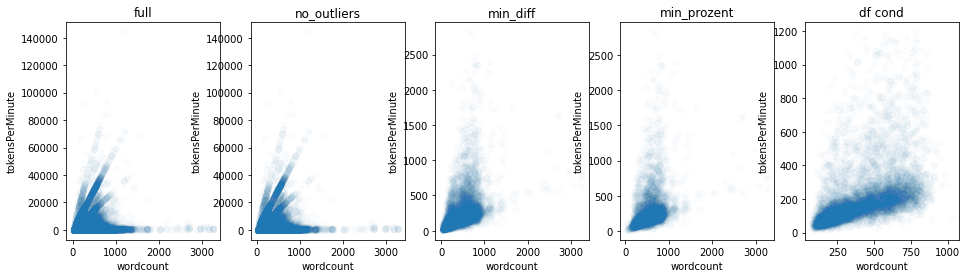

full: (0.06218399776127479, 1.577859369505951e-66)
no_outliers: (0.05733629742650611, 1.2031234142059688e-53)
min_diff: (0.5142218816191582, 0.0)
min_prozent: (0.3973732407066706, 1.1642941961731453e-198)
df: (0.5056211335529214, 0.0)


In [52]:
scatter('wordcount', 'tokensPerMinute')

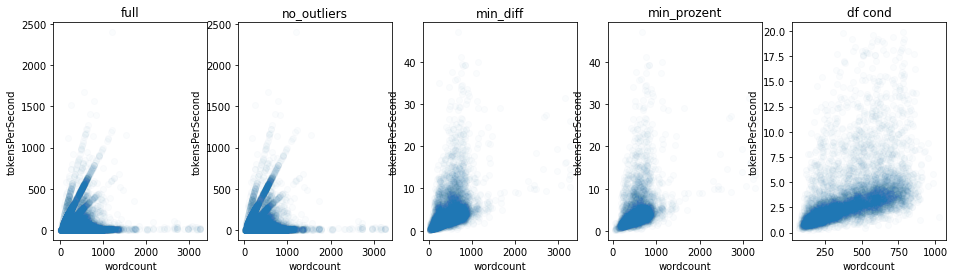

full: (0.0621839977612748, 1.577859369505951e-66)
no_outliers: (0.0573362974265061, 1.2031234142059688e-53)
min_diff: (0.514221881619158, 0.0)
min_prozent: (0.39737324070667057, 1.1642941961731453e-198)
df: (0.5056211335529214, 0.0)


In [53]:
scatter('wordcount', 'tokensPerSecond')

--> Die "Linien" kommen wohl so: Wenn die Anzahl an gemittelten Werten == 1 ist (also pageviews-exits ==1), bleiben oft als avgTimeOnPage ganzzahlige Werte (1 Sekunde, 2 Sekunden...), beim Teilen von Tokenzahl durch avgTimeOnPage entstehen dann diese "geraden Linien"

--> Denn etwa: 1000 Tokens pro 1 Sekunde oder 2 Sekunden etc.

--> wenn man pageviews-exits >= 50 setzt verschwiden sie

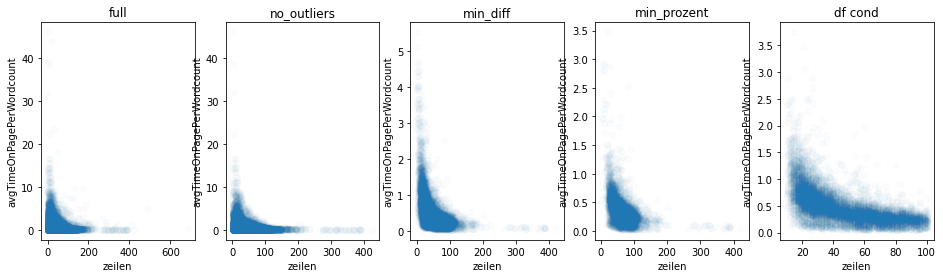

full: (-0.1877602550632351, 0.0)
no_outliers: (-0.22351116220966696, 0.0)
min_diff: (-0.5241868542281658, 0.0)
min_prozent: (-0.446689489032191, 1.2294768955611465e-256)
df: (-0.6125304868237686, 0.0)


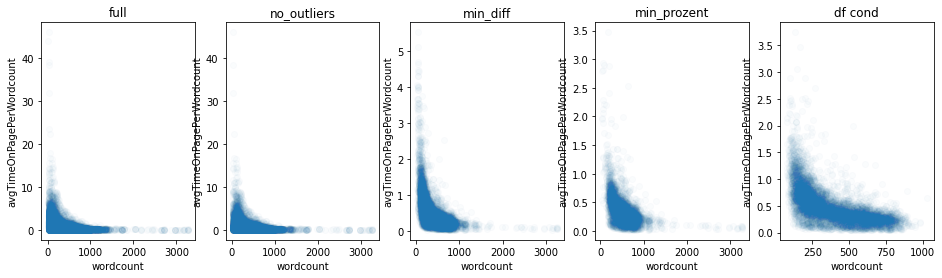

full: (-0.2468466933519962, 0.0)
no_outliers: (-0.2337181856662567, 0.0)
min_diff: (-0.5428093054799394, 0.0)
min_prozent: (-0.4708575212078582, 9.247227314454493e-289)
df: (-0.6211887000382036, 0.0)


In [54]:
scatter('zeilen', 'avgTimeOnPagePerWordcount')
scatter('wordcount', 'avgTimeOnPagePerWordcount')


# hier sieht man: angeblich ist die durchschnittliche Aufenthaltsdauer bei kürzeren Artikeln sehr groß.
# Das liegt aber meiner Meinung daran, dass gerade hier die Zeilenabgaben oft falsch sind
# (vielleicht wegen paywall, also sowas wie "Um diesen Artikel zu lesen, abbonieren Sie...")

# andererseits: wahrscheinlich werden längere Artikel tatsächlich schneller "weggeklickt", schwer zu unterscheiden

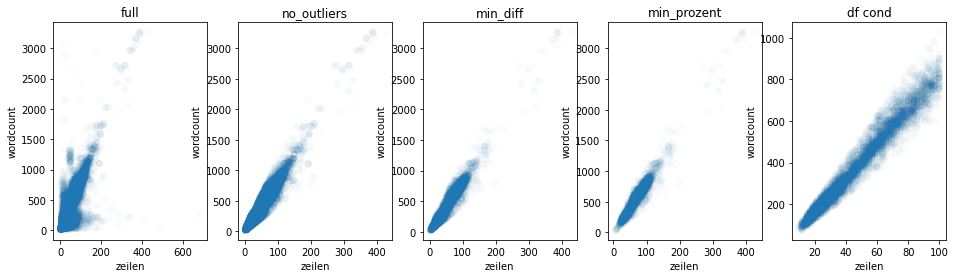

full: (0.9036112715788113, 0.0)
no_outliers: (0.9768537946579179, 0.0)
min_diff: (0.9742169097374107, 0.0)
min_prozent: (0.9725537026675937, 0.0)
df: (0.980522484876449, 0.0)


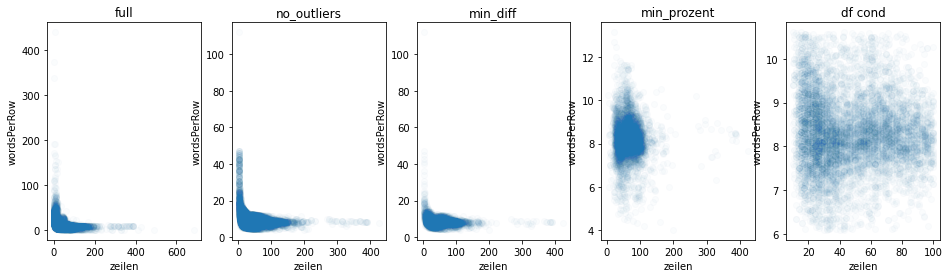

full: (-0.19442515233676294, 0.0)
no_outliers: (-0.24743924917008836, 0.0)
min_diff: (-0.16598917609387986, 2.2270506793988377e-63)
min_prozent: (-0.05216281048935984, 0.00015292574946803697)
df: (-0.04257952992329165, 0.0001530001682245911)


In [55]:
scatter('zeilen', 'wordcount')
scatter('zeilen', 'wordsPerRow')

--> Das zeigt, dass gerade bei den kleinen Zeilenzahlen (etwa <5) irgendwas nicht stimmt, bzw. die Tokenzahl sehr viel größer ist, als die Zeilenangabe vermuten lässt.
- die Zeilenzahl ist gerade bei <5 oft falsch (zu gering)
- oder: was könnte ein "echter" Grund dafür sein?

In [56]:
#scatter('avgTimeOnPagePerWordcount', 'bounceRate')

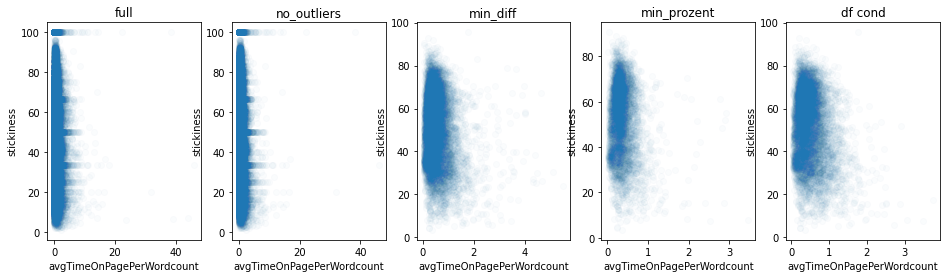

full: (-0.05174729402492004, 1.341140984809219e-46)
no_outliers: (-0.05141370765925284, 1.804903199002023e-43)
min_diff: (-0.2166849240323627, 9.94683893359191e-108)
min_prozent: (-0.16032176106542753, 1.2027683834200847e-31)
df: (-0.23700987875874932, 2.5185771140515402e-101)


In [57]:
scatter('avgTimeOnPagePerWordcount', 'stickiness')

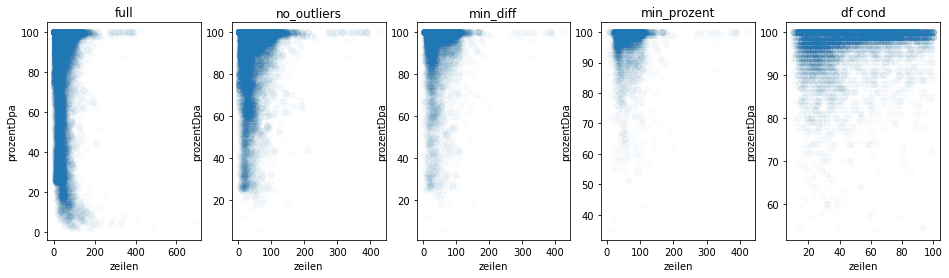

full: (0.0121551865738829, 0.0007658214732644263)
no_outliers: (0.10352432388876835, 3.1855060360332645e-171)
min_diff: (0.10995915800425732, 1.4179112700368294e-28)
min_prozent: (0.04903900612052052, 0.0003719232554297529)
df: (0.15829713909213508, 1.6509566723710303e-45)


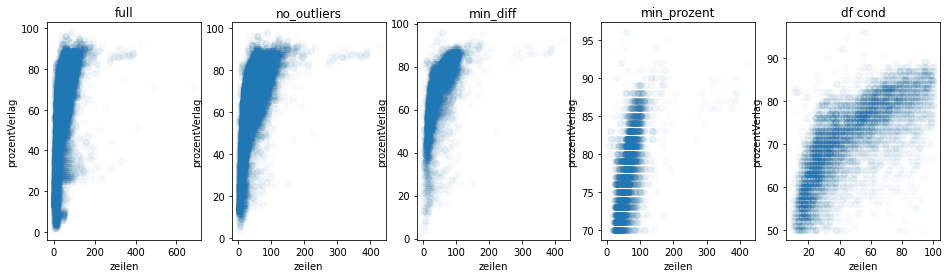

full: (0.6376264831460375, 0.0)
no_outliers: (0.7114644972152296, 0.0)
min_diff: (0.6139673363259749, 0.0)
min_prozent: (0.5629828948029763, 0.0)
df: (0.7331601480288203, 0.0)


In [58]:
scatter('zeilen', 'prozentDpa')
scatter('zeilen', 'prozentVerlag')

--> Spekulation: das könnte ein Hinweis darauf sein, dass Werbung/Bilder etc. zur Anteilsbildung dazugenommen wurden. Und je länger der tatsächliche Artikeltext, desto größer ist sein Anteil im vergleich zu (etwa gleichbleibender) Werbung ?

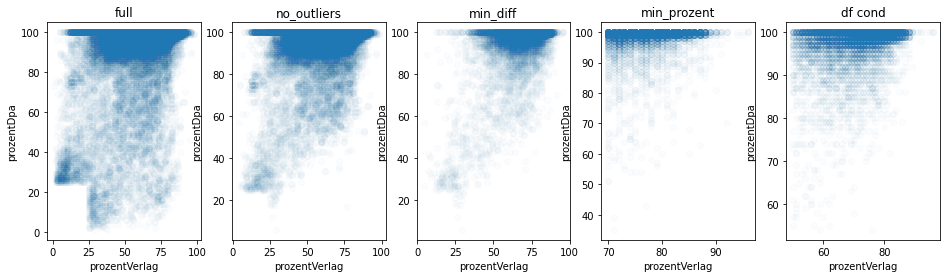

full: (0.3863625348068187, 0.0)
no_outliers: (0.34808026860516583, 0.0)
min_diff: (0.5032090863799463, 0.0)
min_prozent: (0.16435599483430194, 3.407044660743478e-33)
df: (0.24802022216795083, 4.4415929379063045e-111)


In [59]:
#scatter('prozentDpa', 'prozentVerlag')
scatter('prozentVerlag', 'prozentDpa')

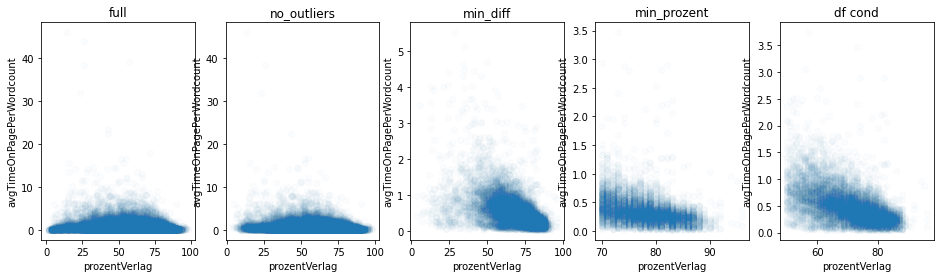

full: (-0.17220395611017553, 0.0)
no_outliers: (-0.20610361611300088, 0.0)
min_diff: (-0.4884831724129671, 0.0)
min_prozent: (-0.3281282125088802, 2.2887420624239688e-132)
df: (-0.5116922351420616, 0.0)


In [60]:
scatter('prozentVerlag', 'avgTimeOnPagePerWordcount')

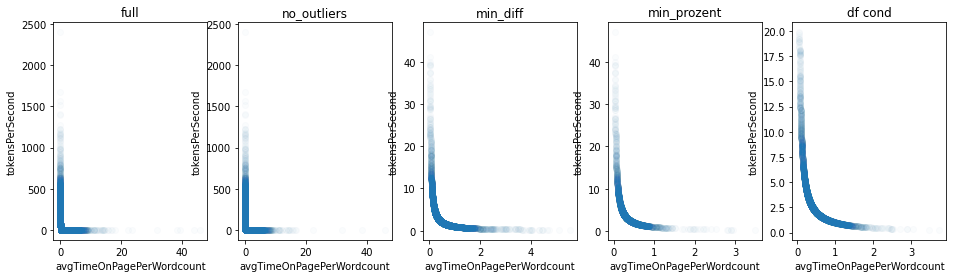

full: (-0.15803630435824803, 0.0)
no_outliers: (-0.16878718196825465, 0.0)
min_diff: (-0.5102811153966864, 0.0)
min_prozent: (-0.5494457711490852, 0.0)
df: (-0.6505700598745671, 0.0)


In [61]:
scatter('avgTimeOnPagePerWordcount', 'tokensPerSecond')

# ERKENNTNISSE:
* generell: wichtiger als pageviews ist pageviews-exits, denn dadurch wird timeOnPage geteilt!
* Grundproblem: Texte die ich habe sind nicht die Texte, zu denen die Werte gehören...
* vor allem bei Division durch Textlänge ist das natürlich unglücklich
* Zeilenabgaben sind schonmal gut, aber irgendwie auch nicht ideal
* Mindestzahl an Zeilen sinnvoll, denn bei denen mit <5 ist alles "fälscher" als bei den längeren
* prozentVerlag sollte möglichst hoch sein, aber ich habe Vorbehalte gegenüber diesen Angaben, denn man findet Beispiele, bei denen das offensichtlich falsch ist
* Aufenthaltsdauer pro Wort korreliert relativ stark mit der Textlänge. Das kann an dem durch das Teilen durch eine falsche Textlänge eingebrachten Fehler liegen (oder anderen Fehlern...) oder aber tatsächlich stimmen: Je länger der Artikel, desto doller "überfliegt" man ihn oder liest ihn einfach nicht ganz.

In [62]:
df_sorted = df.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)
#full_sorted = full.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)

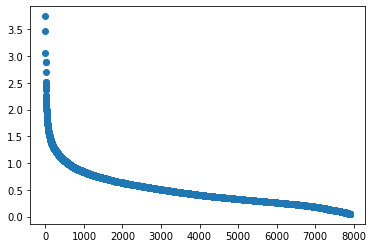

In [63]:
plt.scatter(range(len(df_sorted)), df_sorted.avgTimeOnPagePerWordcount)
#plt.scatter(range(len(df_sorted)), df_sorted.prozentVerlag, alpha=0.2)

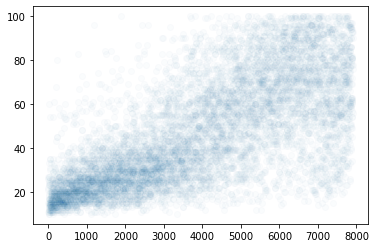

In [64]:
plt.scatter(range(len(df_sorted)), df_sorted.zeilen, alpha=0.02)
# hier sieht man: die Artikel mit den angeblich so langen Aufenthaltsdauern sind die mit kleinen Zeilen?

In [65]:
df_sorted.head(10)

pageviews  entrances  exits  bounces  timeOnPage  conversions  \
articleId                                                                  
2080646          483        393    400       83       41308          NaN   
2067692         6630       6138   6117     1898      300831          NaN   
2008669         6907       6281   6338     2638      250512          NaN   
2011569         1681        606    810      187      244624          NaN   
2042484          726        621    614      128       64662          NaN   
2112603         2546       2365   2405     1123      102262          NaN   
2008726          407        325    344       72       32134          NaN   
2046555          429        245    291       99       33194          NaN   
2081837          323        271    272      101       23200          NaN   
51653403         575        442    439      340       34756          NaN   

           avgTimeOnPage  stickiness  entranceRate  bounceRate  \
articleId                                                        
2080646       497.686747   17.184265     81.366460   17.184265   
2067692       586.415205    7.737557     92.579186   28.627451   
2008669       440.267135    8.238019     90.936731   38.193137   
2011569       280.854191   51.814396     36.049970   11.124331   
2042484       577.339286   15.426997     85.537190   17.630854   
2112603       725.262411    5.538099     92.890809   44.108405   
2008726       510.063492   15.479115     79.852580   17.690418   
2046555       240.536232   32.167832     57.109557   23.076923   
2081837       454.901961   15.789474     83.900929   31.269350   
51653403      255.558824   23.652174     76.869565   59.130435   

           sharePageviews  n  nObs  score_pageviews  score_avgTimeOnPage  \
articleId                                                                  
2080646               100  1   173               19                   19   
2067692               100  1  3071               44                   20   
2008669               100  1  3588               44                   18   
2011569               100  1   606               32                   16   
2042484               100  1   241               24                   20   
2112603               100  1   886               34                   20   
2008726               100  1   239               17                   19   
2046555               100  1   288               18                   15   
2081837               100  1   158               15                   19   
51653403              100  1   158               21                   16   

           score_entranceRate  score_stickiness  SCORE             kategorie  \
articleId                                                                      
2080646                    17                 9     64  deutschland-und-welt   
2067692                    20                 5     89  deutschland-und-welt   
2008669                    20                 6     88  deutschland-und-welt   
2011569                     3                17     68  deutschland-und-welt   
2042484                    19                 9     72  deutschland-und-welt   
2112603                    20                 5     79  deutschland-und-welt   
2008726                    16                 9     61  deutschland-und-welt   
2046555                     7                13     53                 sport   
2081837                    18                 9     61  deutschland-und-welt   
51653403                   15                11     63                  news   

                  rubrik      subRubrik  \
articleId                                 
2080646       wirtschaft            NaN   
2067692    niedersachsen            NaN   
2008669      vermischtes            NaN   
2011569      vermischtes            NaN   
2042484          politik            NaN   
2112603      vermischtes            NaN   
2008726      vermischtes            NaN   
2046555           andere            NaN   
2

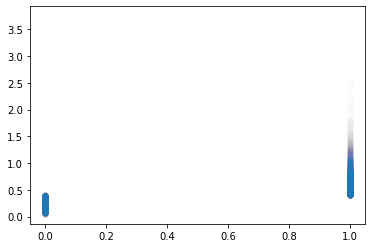

In [66]:
plt.scatter(df.time_class, df.avgTimeOnPagePerWordcount, alpha = 0.002)

In [67]:
print(np.min(df[df.time_class == 1].avgTimeOnPagePerWordcount))
print(np.max(df[df.time_class == 1].avgTimeOnPagePerWordcount))
print("---")
print(np.mean(df[df.time_class == 1].stickiness)) # hm, das ist nicht so schön, längere Aufenthaltsdauer hat geringere Stickiness...
print(np.mean(df[df.time_class == 0].stickiness))
print("---")
print(np.mean(df[df.time_class == 1].avgTimeOnPagePerWordcount))
print(np.mean(df[df.time_class == 0].avgTimeOnPagePerWordcount))

0.400023540489642
3.742005616450767
---
49.83130789482491
54.29337415083333
---
0.7165253672703568
0.25322149635584834


In [68]:
df[df.time_class == 1].head()

pageviews  entrances  exits  bounces  timeOnPage  conversions  \
articleId                                                                  
49297055         109         24     31       11        7165          NaN   
49309881         254         82    110       54       27715          NaN   
49310881         888        610    643      473       66422          NaN   
49318053        4339       3089   2997     2317      255559          NaN   
49320809         186         20     52       11       16372          NaN   

           avgTimeOnPage  stickiness  entranceRate  bounceRate  \
articleId                                                        
49297055       91.858974   71.559633     22.018349   10.091743   
49309881      192.465278   56.692913     32.283465   21.259843   
49310881      271.110204   27.590090     68.693694   53.265766   
49318053      190.431446   30.928785     71.191519   53.399401   
49320809      122.179104   72.043011     10.752688    5.913978   

           sharePageviews  n  nObs  score_pageviews  score_avgTimeOnPage  \
articleId                                                                  
49297055              100  1    79               11                   11   
49309881              100  1   136               14                   14   
49310881              100  1   335               28                   16   
49318053              100  1  1668               39                   14   
49320809              100  1   106               12                   13   

           score_entranceRate  score_stickiness  SCORE kategorie      rubrik  \
articleId                                                                      
49297055                    2                20     44      news    panorama   
49309881                    3                18     49      news     politik   
49310881                   12                12     68      news    panorama   
49318053                   13                13     79      news    panorama   
49320809                    1                20     46      news  wirtschaft   

               subRubrik                                              titel  \
articleId                                                                     
49297055             NaN  unfall-an-strassenbahn-halt-verletzte-noch-in-...   
49309881         ausland  nordkorea-unternimmt-neue-waffentests_aid-4930...   
49310881             NaN      hupen-als-geheimsprache-in-kairo_aid-49310881   
49318053             NaN  polizei-ermittelt-nach-vermutetem-diebstahl-vo...   
49320809   ueberregional  fahrzeugbestand-trotz-umweltdebatte-deutlich-e...   

                                                    pagePath  \
articleId                                                      
49297055   https://www.general-anzeiger-bonn.de/news/pano...   
49309881   https://www.general-anzeiger-bonn.de/news/poli...   
49310881   https://www.general-anzeiger-bonn.de/news/pano...   
49318053   https://www.general-anzeiger-bonn.de/news/pano...   
49320809   https://www.general-anzeiger-bonn.de/news/wirt...   

                    dpaGuid  zeilen  prozentDpa  prozentVerlag categoryCode  \
articleId                                                                     
49297055   200302-99-153664      18         100             52    dpacat:vm   
49309881   200302-99-151235      52         100             84    dpacat:pl   
49310881   200301-99-144607      65         100             75    dpacat:vm   
49318053   200302-99-153809      15         100             54    dpacat:vm   
49320809   200302-99-154226      21         100             69    dpacat:wi   

                  creationDate  flextags            genre  \
articleId                                                   
49297055   2020-03-02 12:51:46       NaN          Meldung   
49309881   2020-03-02 11:07:33       NaN  Zusammenfassung   
49310881   2020-03-02 06:30:41       NaN     KORR-Bericht   
49318053   2020-03-02 12:54:36       NaN          Meldung  

In [69]:
df2 = utils.get_conditioned_df(delete_zeilen_mismatch=False)

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (84887, 72)
Shape of remaining df after conditioning: (8477, 74)


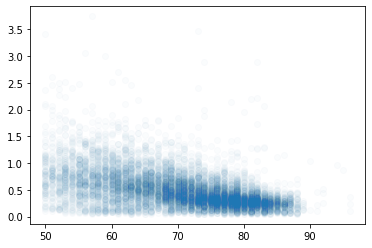

In [70]:
plt.scatter(df2.prozentVerlag, df2.avgTimeOnPagePerWordcount, alpha=0.02)

In [71]:
trial = utils.get_raw_df()
trial.set_index('articleId', inplace=True)
trial = trial[trial['pageviews-exits'] >= 50]
print(trial.shape)

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Shape of raw df: (84887, 72)
(11469, 71)


In [72]:
# conditioning "by hand"
trial = utils.get_conditioned_df(min_diff_pageviews_exits = 50,
                       min_wordcount = 200,
                       max_wordcount = 1000000000, # dummy
                       min_zeilen = 5, #6, #10, # some have very little zeilen, doesn't make sense (maybe because payed content?)
                       min_avgTimeOnPage = 0,
                       max_avgTimeOnPage = 1200, # 1200, # max 20 minutes
                       min_avgTimeOnPagePerWordcount = 0.0001,
                       max_avgTimeOnPagePerWordcount = 100000,
                       delete_outliers = False, #True,
                       delete_zeilen_mismatch = False, #True, #True, # delete articles where match of zeilen and wordcount ist far off
                       add_time_class = True, # adds a binary time_class label
                       min_prozentDpa = 80,
                       min_prozentVerlag = 50
                       )

Shape of raw df: (84887, 72)
Shape of remaining df after conditioning: (6650, 74)


In [73]:
trial.set_index('articleId', inplace=True)

In [74]:
trial.ausreisser.value_counts()

nein    6542
ja       108
Name: ausreisser, dtype: int64

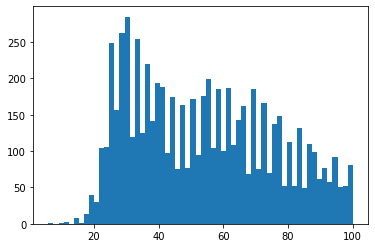

In [75]:
plt.hist(trial.zeilen, 60)
plt.show()

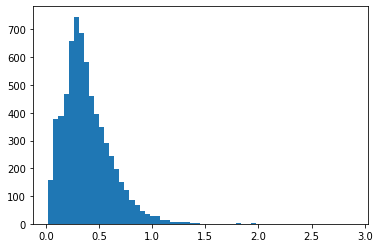

In [76]:
plt.hist(trial.avgTimeOnPagePerWordcount, 60)
plt.show()

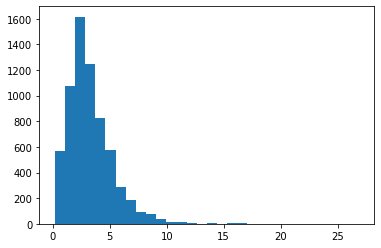

In [77]:
plt.hist(trial.avgTimeOnPagePerRow, 30)
plt.show()

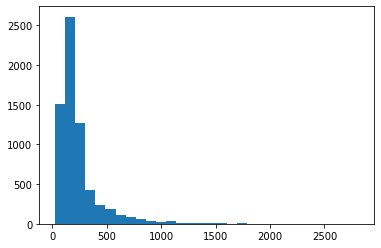

In [78]:
plt.hist(trial.tokensPerMinute, 30)
plt.show()

(-0.2468466933519962, 0.0)


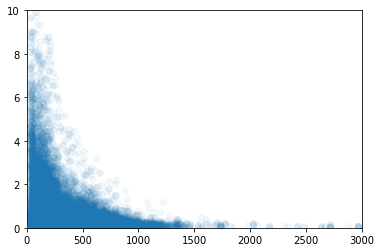

In [79]:
plt.scatter(full.wordcount, full.avgTimeOnPagePerWordcount, alpha = 0.05)
plt.xlim(0, 3000)
plt.ylim(0, 10)
print(st.pearsonr(full.wordcount, full.avgTimeOnPagePerWordcount))

(-0.6211887000382036, 0.0)


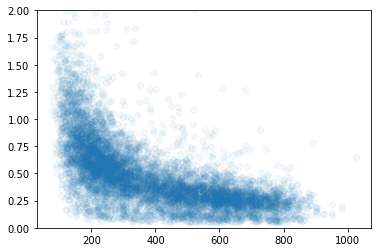

In [80]:
plt.scatter(df.wordcount, df.avgTimeOnPagePerWordcount, alpha = 0.05)
#plt.xlim(0, 1000)
plt.ylim(0, 2)
print(st.pearsonr(df.wordcount, df.avgTimeOnPagePerWordcount))

(0.18783602408669456, 0.0)


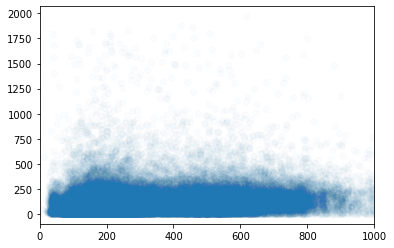

In [81]:
plt.scatter(full.wordcount, full.avgTimeOnPage, alpha = 0.02)
plt.xlim(0, 1000)
#plt.ylim(0, 600)
print(st.pearsonr(full.wordcount, full.avgTimeOnPage))

(0.22967704375151346, 4.2018637163680615e-95)


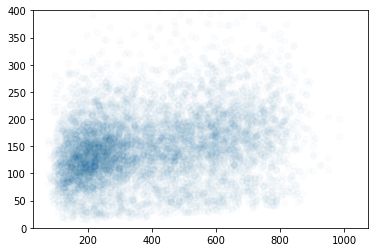

In [82]:
plt.scatter(df.wordcount, df.avgTimeOnPage, alpha = 0.02)
#plt.xlim(0, 1000)
plt.ylim(0, 400)
print(st.pearsonr(df.wordcount, df.avgTimeOnPage))

In [83]:
trial.sort_values('avgTimeOnPagePerWordcount', ascending=False).head(10)

pageviews  entrances  exits  bounces  timeOnPage  conversions  \
articleId                                                                  
2042484          726        621    614      128       64662          NaN   
2112603         2546       2365   2405     1123      102262          NaN   
2008726          407        325    344       72       32134          NaN   
2109163          685        627    612      192       40076          NaN   
2128511          674        602    572      123       52255          NaN   
2121605          976        861    865      380       60361          NaN   
2091240          387        329    327      102       62863          NaN   
2051213         1172       1074   1071      450       42340          NaN   
2058308        10565       9738   9704     3257      408934          NaN   
2102619         3290       2750   2783      740      235699          NaN   

           avgTimeOnPage  stickiness  entranceRate  bounceRate  \
articleId                                                        
2042484       577.339286   15.426997     85.537190   17.630854   
2112603       725.262411    5.538099     92.890809   44.108405   
2008726       510.063492   15.479115     79.852580   17.690418   
2109163       548.986301   10.656934     91.532847   28.029197   
2128511       512.303922   15.133531     89.317507   18.249258   
2121605       543.792793   11.372951     88.217213   38.934426   
2091240      1047.716667   15.503876     85.012920   26.356589   
2051213       419.207921    8.617747     91.638225   38.395904   
2058308       474.952381    8.149550     92.172267   30.828206   
2102619       464.889546   15.410334     83.586626   22.492401   

           sharePageviews  n  nObs  score_pageviews  score_avgTimeOnPage  \
articleId                                                                  
2042484               100  1   241               24                   20   
2112603               100  1   886               34                   20   
2008726               100  1   239               17                   19   
2109163               100  1   249               23                   20   
2128511               100  1   133               23                   19   
2121605               100  1   639               30                   20   
2091240               100  1   205               17                   20   
2051213               100  1   442               31                   18   
2058308               100  1  3117               50                   19   
2102619               100  1   847               36                   19   

           score_entranceRate  score_stickiness  SCORE             kategorie  \
articleId                                                                      
2042484                    19                 9     72  deutschland-und-welt   
2112603                    20                 5     79  deutschland-und-welt   
2008726                    16                 9     61  deutschland-und-welt   
2109163                    20                 7     70  deutschland-und-welt   
2128511                    20                 9     71  deutschland-und-welt   
2121605                    20                 7     77  deutschland-und-welt   
2091240                    19                 9     65  deutschland-und-welt   
2051213                    20                 6     75  deutschland-und-welt   
2058308                    20                 6     95  deutschland-und-welt   
2102619                    18                 9     82  deutschland-und-welt   

                  rubrik subRubrik  \
articleId                            
2042484          politik       NaN   
2112603      vermischtes       NaN   
2008726      vermischtes       NaN   
2109163    gut-zu-wissen       NaN   
2128511          politik       NaN   
2121605          politik       NaN   
2091240          politik       NaN   
2051213    niedersachsen       NaN   
2058308          politik       NaN   
2102619      

In [84]:
trial.sort_values('prozentVerlag', ascending = False).head(10)

pageviews  entrances  exits  bounces  timeOnPage  conversions  \
articleId                                                                  
49573363         376        135    173       95       38265          NaN   
49573343         132         73     80        2        2603          NaN   
49573351         227         23     80       19       18242          NaN   
2044250          425        336    352      108       25321          NaN   
2016873          869        785    792      514       38082          NaN   
50297379         636        461    455      332       31691          NaN   
2048336         5114       1291   1970      301      492057          NaN   
50297309         503        419    415      250        8754          NaN   
2040774          140         13     50        8       22883          NaN   
49510493         219         73     97        2        6146          NaN   

           avgTimeOnPage  stickiness  entranceRate  bounceRate  \
articleId                                                        
49573363      188.497537   53.989362     35.904255   25.265957   
49573343       50.057692   39.393939     55.303030    1.515152   
49573351      124.095238   64.757709     10.132159    8.370044   
2044250       346.863014   17.176471     79.058824   25.411765   
2016873       494.571429    8.860759     90.333717   59.148446   
50297379      175.088398   28.459119     72.484277   52.201258   
2048336       156.506679   61.478295     25.244427    5.885804   
50297309       99.477273   17.495030     83.300199   49.701789   
2040774       254.255556   64.285714      9.285714    5.714286   
49510493       50.377049   55.707763     33.333333    0.913242   

           sharePageviews  n  nObs  score_pageviews  score_avgTimeOnPage  \
articleId                                                                  
49573363              100  1   174               17                   14   
49573343              100  1    95               11                    8   
49573351              100  1   152               13                   13   
2044250               100  1   169               18                   17   
2016873               100  1   193               28                   19   
50297379              100  1   269               22                   14   
2048336               100  1  1044               41                   13   
50297309              100  1   337               19                   11   
2040774               100  1   102               11                   15   
49510493              100  1   124               13                    8   

           score_entranceRate  score_stickiness  SCORE             kategorie  \
articleId                                                                      
49573363                    3                17     51                  news   
49573343                    7                14     40           nachrichten   
49573351                    1                19     46            wirtschaft   
2044250                    16                 9     60  deutschland-und-welt   
2016873                    20                 6     73  deutschland-und-welt   
50297379                   14                12     62                  news   
2048336                     3                19     76  deutschland-und-welt   
50297309                   18                 9     57           nachrichten   
2040774                     1                19     46  deutschland-und-welt   
49510493                    3                18     42           nachrichten   

               rubrik      subRubrik  \
articleId                              
49573363   wirtschaft  ueberregional   
49573343   wirtschaft            NaN   
49573351          NaN            NaN   
2044250    wirtschaft            NaN   
2016873    wirtschaft            NaN   
50297379   wirtschaft  ueberregional   
2048336       politik            NaN   
50297309   wirtschaft            NaN   
2040774       politik          

In [270]:
def show_ID(df, c_list, ID):
    df = df
    for c in c_list:
        print(f"{c}:", df.loc[ID, c])

In [271]:
full.loc[2058641].text

'Hannover (dpa)\xa0- Niedersachsen will im Kampf gegen das Coronavirus an\nder Maskenpflicht und den Abstandsregeln bis zur Verfügbarkeit eines\nImpfstoffes festhalten. Das sagte Gesundheitsministerin Carola\nReimann (SPD) am Montag in Hannover. Den von Thüringen in Aussicht\ngestellten Verzicht auf landesweit gültige Corona-Schutzvorschriften\nvom 6. Juni an bezeichnete Reimann als «schwerwiegenden Fehler» und\nein «vollkommen falsches Signal». Dass die Corona-Epidemie derzeit\nunter Kontrolle sei, sei nachweislich den Beschränkungen zu\nverdanken, betonte Reimann.\n\nThüringens Ministerpräsident Bodo Ramelow (Linke) hatte ein Ende des\nlandesweiten Corona-Lockdowns angekündigt und in Aussicht gestellt,\ndass ab dem 6. Juni auf allgemeine Schutzvorschriften verzichtet\nwerden soll. Am Montag sagte er im Interview mit RTL/ntv, er werde\ndem Kabinett vorschlagen, «dass zum Beispiel in den öffentlichen\nVerkehrsmitteln weiterhin der Mund-Nasen-Schutz bleiben soll».\nÄhnlich äußerte er si

In [91]:
full[full.publisher == 'SZ']

pageviews  entrances   exits  bounces  timeOnPage  conversions  \
articleId                                                                   
49204663     1086222     521499  551866   122056    45536261          NaN   
49307865          18         12      13        0          36          NaN   
49307953         260        149     159        4        9635          NaN   
49308007          28         13      18        0         325          NaN   
49308031          78         52      50        4        2081          NaN   
...              ...        ...     ...      ...         ...          ...   
53516439           4          0       1        0         148          NaN   
53516487           6          3       2        2         227          NaN   
53516921          16         12      14       12         187          NaN   
53517021          40          3       7        3        2780          NaN   
53518207           2          0       0        0          17          NaN   

           avgTimeOnPage  stickiness  entranceRate  bounceRate  \
articleId                                                        
49204663       85.217086   49.193995     48.010351   11.236745   
49307865        7.200000   27.777778     66.666667    0.000000   
49307953       95.396040   38.846154     57.307692    1.538462   
49308007       32.500000   35.714286     46.428571    0.000000   
49308031       74.321429   35.897436     66.666667    5.128205   
...                  ...         ...           ...         ...   
53516439       49.333333   75.000000      0.000000    0.000000   
53516487       56.750000   66.666667     50.000000   33.333333   
53516921       93.500000   12.500000     75.000000   75.000000   
53517021       84.242424   82.500000      7.500000    7.500000   
53518207        8.500000  100.000000      0.000000    0.000000   

           sharePageviews  n    nObs  score_pageviews  score_avgTimeOnPage  \
articleId                                                                    
49204663              100  1  220222               50                   10   
49307865              100  1      14                2                    2   
49307953              100  1     186               14                   11   
49308007              100  1      19                3                    6   
49308031              100  1      56                8                    9   
...                   ... ..     ...              ...                  ...   
53516439              100  1       2                1                    7   
53516487              100  1       4                1                    8   
53516921              100  1      16                2                   11   
53517021              100  1      25                4                   10   
53518207              100  1       1                1                    2   

           score_entranceRate  score_stickiness  SCORE    kategorie  \
articleId                                                             
49204663                    4                16     80     saarland   
49307865                   11                12     27        sport   
49307953                    7                14     46  nachrichten   
49308007                    4                14     27  nachrichten   
49308031                   11                14     42  nachrichten   
...                       ...               ...    ...          ...   
53516439                    0                20     28  nachrichten   
53516487                    4                20     33  nachrichten   
53516921                   14                 8     35  nachrichten   
53517021                    1                20     35  nachrichten   
53518207                    0                20     23  nachrichten   

                 rubrik         subRubrik  \
articleId                                   
49204663   saarbruecken               NaN   
49307865       fussball  auslandsfussball   
49307953        politik        

In [93]:
ID = 53516439 # 51806027 #2058641
c_list = ['creationDate', 'text', 'teaser', 'pagePath', 'publisher', 'zeilen', 'wordcount', 'wordsPerRow', 'avgTimeOnPage', 
          'avgTimeOnPagePerWordcount', 'avgTimeOnPagePerRow', 'tokensPerMinute', 'prozentDpa', 'prozentVerlag']

show_ID(df = full, c_list = c_list, ID = ID)

---- ID: 53516439
---- creationDate:
2020-09-23 08:05:00
---- text:
Nürnberg (dpa) - Ungeachtet der Ankündigung Zehntausender
Stellenstreichungen und eines wieder anschwellenden
Infektionsgeschehens in der Corona-Pandemie hat sich die Konsumlaune
der Verbraucher in Deutschland nicht weiter verschlechtert. Sie
«sehen die Konjunktur ganz klar auf Erholungskurs», sagte Rolf Bürkl
vom Nürnberger Konsumforschungsunternehmen GfK.

In der neuesten GfK-Studie prognostizieren die Experten für Oktober
einen Konsumklima-Wert von -1,6, eine kleine Verbesserung gegenüber
September (-1,7). Auf dem Höhepunkt der Corona-Krise war ein
Negativrekord von -23 erreicht worden. In normalen Zeiten bewegt sich
das Konsumklima mit wenig Veränderung um einen Wert von +10.

Die Verbraucher sähen die wirtschaftlichen Auswirkungen der
Corona-Pandemie nicht ganz so dramatisch wie ursprünglich befürchtet,
sagte Bürkl. Wesentlich mitverantwortlich für die Stabilisierung der
Lage sei die recht positive Einkommenserwar

In [85]:
ID2 = 50401013
show_ID(df = full, c_list = c_list, ID = ID2)

---- ID: 50401013
---- titelH1:
Bund: Großveranstaltungen wohl mindestens bis Ende August verboten
---- titel:
bund-grossveranstaltungen-wohl-mindestens-bis-ende-august-verboten_aid-50401013
---- pagePath:
https://www.general-anzeiger-bonn.de/news/ticker/bund-grossveranstaltungen-wohl-mindestens-bis-ende-august-verboten_aid-50401013
---- teaser:
nan
---- text:
Berlin (dpa) - Großveranstaltungen wie Volksfeste, größere
Sportveranstaltungen mit Zuschauern, größere Konzerte, Festivals,
Dorf-, Straßen- oder Schützenfeste sowie Kirmes-Veranstaltungen
bleiben wegen der Corona-Pandemie untersagt. «Wegen der immer noch
gegebenen Unsicherheit des Infektionsgeschehens ist davon auszugehen,
dass dies auch mindestens bis zum 31. August so bleiben wird.» Das
geht aus der Beschlussvorlage des Bundes für die Beratungen von
Kanzlerin Angela Merkel (CDU) mit den Regierungschefs der Länder an
diesem Mittwochmittag hervor, die der Deutschen Presse-Agentur in
Berlin vorliegt.
---- publisher:
bonn
---- pag

In [274]:
#full.sort_values('prozentVerlag', ascending = False)[full.zeilen < 15]
full.sort_values('avgTimeOnPagePerWordcount', ascending = False)[full.prozentVerlag > 50]

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


pageviews  entrances  exits  bounces  timeOnPage  conversions  \
articleId                                                                  
2044606          121        109    113       37       12539          NaN   
2130144            3          2      2        2         971          NaN   
52949717          11          6      7        2        3576          NaN   
51739919           5          4      4        1        1572          NaN   
2074381            3          2      2        1        1740          NaN   
...              ...        ...    ...      ...         ...          ...   
51739663           5          3      3        0           1          NaN   
51309113          14          4      8        0           1          NaN   
49798757           9          6      7        0           1          NaN   
49719807           7          3      4        0           1          NaN   
49917061           5          3      3        0           1          NaN   

           avgTimeOnPage  stickiness  entranceRate  bounceRate  \
articleId                                                        
2044606      1567.375000    6.611570     90.082645   30.578512   
2130144       971.000000   33.333333     66.666667   66.666667   
52949717      894.000000   36.363636     54.545455   18.181818   
51739919     1572.000000   20.000000     80.000000   20.000000   
2074381      1740.000000   33.333333     66.666667   33.333333   
...                  ...         ...           ...         ...   
51739663        0.500000   40.000000     60.000000    0.000000   
51309113        0.166667   42.857143     28.571429    0.000000   
49798757        0.500000   22.222222     66.666667    0.000000   
49719807        0.333333   42.857143     42.857143    0.000000   
49917061        0.500000   40.000000     60.000000    0.000000   

           sharePageviews  n  nObs  score_pageviews  score_avgTimeOnPage  \
articleId                                                                  
2044606               100  1    89               11                   20   
2130144               100  1     3                1                   20   
52949717              100  1    10                2                   20   
51739919              100  1     5                1                   20   
2074381               100  1     3                1                   20   
...                   ... ..   ...              ...                  ...   
51739663              100  1     3                1                    1   
51309113              100  1     8                2                    1   
49798757              100  1     7                1                    1   
49719807              100  1     4                1                    1   
49917061              100  1     3                1                    1   

           score_entranceRate  score_stickiness  SCORE             kategorie  \
articleId                                                                      
2044606                    20                 5     56  deutschland-und-welt   
2130144                    11                13     45  deutschland-und-welt   
52949717                    6                14     42           nachrichten   
51739919                   16                10     47               magazin   
2074381                    11                13     45  deutschland-und-welt   
...                       ...               ...    ...                   ...   
51739663                    8                14     24                 sport   
51309113                    3                15     21                 sport   
49798757                   11                11     24           nachrichten   
49719807                    4                15     21                 sport   
49917061                    8                14     24                 sport   

               rubrik         subRubrik  \
articleId                                 
2044606      z-archiv               NaN   
2130

In [275]:
ID3 = 2074381 #51806027 #50401013
show_ID(df = full, c_list = c_list, ID = ID3)

text: Los Angeles (dpa) - Der amerikanische Regisseur und Drehbuchautor
Joel Schumacher, der unter anderem durch «Batman»-Filme bekannt
wurde, ist tot. Er starb am Montag in New York nach einem einjährigen
Kampf gegen Krebs, wie sein Sprecherteam der Deutschen Presse-Agentur
mitteilte. Schumacher wurde 80 Jahre alt.

Er drehte Filme wie «Falling Down» und die Comic-Verfilmungen «Batman
Forever» (1995) und «Batman & Robin» (1997). In den 1990er Jahren
inszenierte er die beiden John-Grisham-Bestseller «Die Jury» und
«Der Klient». Schon mit seinem dritten Regieprojekt
«St. Elmo's Fire - Die Leidenschaft brennt tief» war Schumacher 1985
in Hollywood aufgefallen. Seinen letzten Spielfilm drehte er im Jahr
2011. In dem Verbrecherdrama «Trespass - Auf Leben und Tod»
übernahmen Nicolas Cage und Nicole Kidman die Hauptrollen.
teaser: nan
pagePath: https://www.noz.de/deutschland-und-welt/z-archiv/artikel/2074381/batman-regisseur-joel-schumacher-gestorben-7
publisher: NOZ
zeilen: 13
wordcount: 11

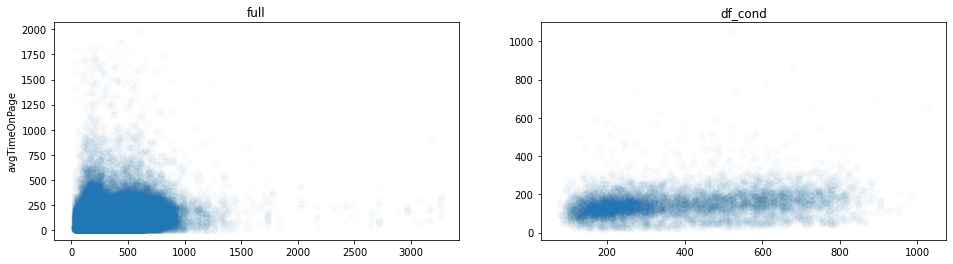

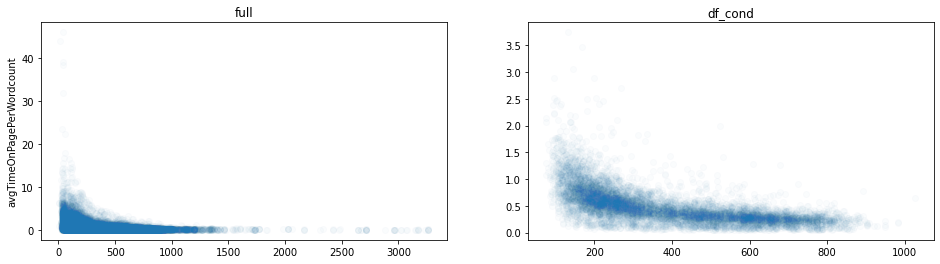

In [276]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 4))
ax1.scatter(full.wordcount, full.avgTimeOnPage, alpha=0.02)
ax1.set_title('full')
ax1.set(ylabel='avgTimeOnPage')

ax2.scatter(df.wordcount, df.avgTimeOnPage, alpha=0.02)
ax2.set_title('df_cond')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 4))
ax1.scatter(full.wordcount, full.avgTimeOnPagePerWordcount, alpha=0.02)
ax1.set_title('full')
ax1.set(ylabel='avgTimeOnPagePerWordcount')

ax2.scatter(df.wordcount, df.avgTimeOnPagePerWordcount, alpha=0.02)
ax2.set_title('df_cond')

plt.show()

In [277]:
min_diff.sort_values('avgTimeOnPage', ascending=False)

pageviews  entrances  exits  bounces  timeOnPage  conversions  \
articleId                                                                  
2119087         1347       1244   1247      459      163326          NaN   
2091240          387        329    327      102       62863          NaN   
2088431          476        412    418      143       49833          NaN   
2016794          553        486    468      154       66545          NaN   
2087509          704        647    628      190       56816          NaN   
...              ...        ...    ...      ...         ...          ...   
51440909        1326        922    919       41        5910          NaN   
49698377        3492       2273   2256      101       17891          NaN   
50359821         587         56     55       37        7415          NaN   
49706907          90         16     20        0         953          NaN   
50117611          58          5      6        0         365          NaN   

           avgTimeOnPage  stickiness  entranceRate  bounceRate  \
articleId                                                        
2119087      1633.260000    7.423905     92.353378   34.075724   
2091240      1047.716667   15.503876     85.012920   26.356589   
2088431       859.189655   12.184874     86.554622   30.042017   
2016794       782.882353   15.370705     87.884268   27.848101   
2087509       747.578947   10.795455     91.903409   26.988636   
...                  ...         ...           ...         ...   
51440909       14.520885   30.693816     69.532428    3.092006   
49698377       14.474919   35.395189     65.091638    2.892325   
50359821       13.937970   90.630324      9.540034    6.303237   
49706907       13.614286   77.777778     17.777778    0.000000   
50117611        7.019231   89.655172      8.620690    0.000000   

           sharePageviews  n  nObs  score_pageviews  score_avgTimeOnPage  \
articleId                                                                  
2119087               100  1   568               31                   20   
2091240               100  1   205               17                   20   
2088431               100  1   182               19                   20   
2016794               100  1   125               21                   20   
2087509               100  1   381               24                   20   
...                   ... ..   ...              ...                  ...   
51440909              100  1   237               31                    3   
49698377              100  1   476               37                    3   
50359821              100  1    62               21                    3   
49706907              100  1    30                9                    3   
50117611              100  1     7                6                    2   

           score_entranceRate  score_stickiness  SCORE             kategorie  \
articleId                                                                      
2119087                    20                 5     76  deutschland-und-welt   
2091240                    19                 9     65  deutschland-und-welt   
2088431                    19                 8     66  deutschland-und-welt   
2016794                    19                 9     69  deutschland-und-welt   
2087509                    20                 7     71  deutschland-und-welt   
...                       ...               ...    ...                   ...   
51440909                   12                13     59           nachrichten   
49698377                   11                14     65           nachrichten   
50359821                    1                20     45                 sport   
49706907                    2                20     34              saarland   
50117611                    1                20     29           nachrichten   

                     rubrik subRubrik  \
articleId                               
2119087         vermischtes       NaN   
2091240   

In [278]:
ID2 = 2119087
show_ID(df = full, c_list = c_list, ID = ID2)

text: Berlin (dpa) - Seit neun Jahren steigt in Deutschland die Zahl der
Rauschgiftdelikte, die der Polizei bekannt werden. Das
Bundeskriminalamt (BKA) geht davon aus, dass dies nicht nur das
Ergebnis erfolgreicher Fahndung ist. Vielmehr sieht die Behörde in
dem Anstieg auch einen Hinweis darauf, dass hierzulande mehr illegale
Drogen konsumiert werden. Denn das Kontrollniveau war 2019 laut
BKA-Chef Holger Münch etwa so hoch wie im Jahr zuvor.

Der mit Abstand größte Anstieg (plus 12,2 Prozent) wurde 2019 bei
Delikten im Zusammenhang mit Kokain verzeichnet. «Wir stellen fest,
dass es keine Elite-Droge mehr ist», erklärte Münch am Dienstag in
Berlin bei der Vorstellung des aktuellen Lagebildes zur
Drogenkriminalität. Auch junge Menschen griffen vermehrt zu Kokain.

Einen leichten Rückgang gab es dagegen im Handel mit Crystal Meth.
Die Drogenbeauftragte der Bundesregierung, Daniela Ludwig (CSU),
sieht darin auch das Ergebnis erfolgreicher Präventionsarbeit.
Beispielsweise habe man 2015 be

## Welche Beschränkungen haben welche Anteile?

In [36]:
full = utils.get_raw_df()
full.shape
len_full = len(full)
print(len(full))

Shape of raw df: (84887, 71)
84887


In [45]:
min_views = len(full[full['pageviews-exits'] >= 50])
min_zeilen = len(full[full.zeilen >= 10])
min_prozentVerlag = len(full[full.prozentVerlag >= 50])
window_zeit = len(full[(full.avgTimeOnPage >= 2) & (full.avgTimeOnPage <= 1200)])
no_outliers = len(full[full.ausreisser == 'nein'])



print("Anteil 'pageviews-exits' >= 50 an full :", np.round(min_views/len_full*100, 2))
print("Anteil 'zeilen' >= 10 an full :", np.round(min_zeilen/len_full*100, 2))
print("Anteil 'prozentVerlag' >= 50 an full :", np.round(min_prozentVerlag/len_full*100, 2))
print("Anteil 'avgTimeOnPage' >= 2 and <= 1200 an full :", np.round(window_zeit/len_full*100, 2))
print("Anteil 'ausreisser' == 'nein' an full :", np.round(no_outliers/len_full*100, 2))

Anteil 'pageviews-exits' >= 50 an full : 13.51
Anteil 'zeilen' >= 10 an full : 95.65
Anteil 'prozentVerlag' >= 50 an full : 82.28
Anteil 'avgTimeOnPage' >= 2 and <= 1200 an full : 86.57
Anteil 'ausreisser' == 'nein' an full : 94.0


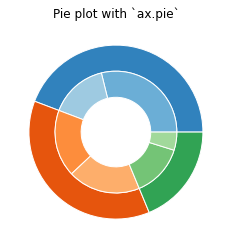

In [14]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

## Probleme

* Die Texte im Datensatz sind die originalen dpa-Meldungen, die KPI-Werte sind aber natürlich zu den tatsächlich erschienenen Artikeln der Publisher, die (unterschiedlich stark) davon stark abweichen können. Das ist sehr ungünstig für jegliche Modellierung und stellt die gesamte Aussagekraft in Frage...
* Das ist mir leider erst vor ein paar Wochen aufgefallen, ich dachte, ich hätte den echten Artikeltext.
* Besonders für die - bisher verwendete - Zielvariable 'avgTimeOnPagePerWordcount' ist das sehr relevant, da die Textlänge oft sehr unterschiedlich ist, die Division die Zahlen also stark manipuliert.
* Es ist sehr schwer, einen Überblick darüber zu bekommen, wieviele/welche Artikel das besonder betrifft, da die meisten Links nicht mehr gültig sind und nur händisch einzelne Artikel betrachtet werden können.
* Auf Nachfrage habe ich drei neue Angaben erhalten, die eventuell dabei helfen, besonders "falsche" Artikel zu erkennen und eventuell rauszufiltern. Aber auch hier habe ich meine Vorbehalte.
 * 'zeilen': Soll Information über die tatsächliche Artikellänge enthalten, sodass man zu große Abweichungen in der Textlänge erkennen kann. Aber: Gerade bei kleinen Zeilenabgaben (<10) habe ich mehrere Beispiele gefunden, bei denen die Angabe eindeutig falsch ist (zB auch zeilen==0). Außerdem ist natürlich a) jede Grenze sehr willkürlich, b) was bedeutet überhaupt Zeile bei Webinhalten und c) selbst wenn die Längen einigermaßen übereinstimmen muss das nicht heißen, dass der Text relativ unverändert ist.
 * 'prozentDpa' und 'prozentArtikel': Angaben darüber, welcher Anteil der dpa-Meldung in den Artikel eingeflossen ist bzw. zu welchem Anteil der Artikel aus dpa-Inhalt besteht. Beides, aber vor allem letzteres sollte also möglichst hoch sein. Aber a) bei einer Beschränkung von mind. 80% fallen bereits der Großteil der Artikel weg, b) auch hier habe ich Beispiele gefunden, bei denen die Angaben eindeutig falsch sind.
 
* Seltsam ist, dass trotz aller Unzulänglichkeiten die Modellierung ja einigermaßen funktioniert. Jedenfalls wenn Pearson r von ~0.6 glaubhaft ist.
* Ich habe dann auch mit anderen Zielvariablen rumprobiert, das funktioniert aber alles weniger gut (Laut Pearson, aber vielleicht ist das auch einfach keine gute Metrik? Ich betrachte auch MAE, aber das ist natürlcih schwer zu vergleichen, da unterschiedliche Einheiten.).
* Vielleicht wäre 'avgTimeOnPage' besser, da wenigstens kein Fehler durch die Textlänge eingebracht wird?
* Natürlich ist in der Theorie (und auch tatsächlich, aber nicht so stark) die Aufenthaltsdauer von der Textlänge abhängig. Aber vielleicht ist dieser Fehler weniger schlimm als die falsche Division?
 * Übrigens ist auch die 'avgTimeOnPagePerWordcount' nicht unabhängig von der Textlänge: Je länger der Text desto kleiner die Aufenthaltsdauer. Mir ist aber unklar, ob das an der insgesamt unzulänglichen Division liegt, oder aber ein echter Effekt: Längere Texte werden tendenziell schneller gelesen ("überflogen") bzw. einfach vorher weggeklickt.
* Leider ist aber die Modellierung von anderen Variablen, die weniger von der Textlänge abhängen und damit vielleicht weniger betroffen von der Problematik sind (pageviews, stickiness, bounceRate), auch nicht erfolgreicher (bei Betrachtung von Pearson).
 



In [88]:
from functools import reduce

In [596]:
myfunc = lambda x,y: [y] + x if isinstance(x,list) else [y,x]


In [793]:
mylist = [1,2,3,4]
reduce(myfunc, mylist)

[4, 3, 2, 1]

In [718]:
mylist2 = [1, 2, [3,4], 5]
reduce(myfunc, mylist2)

[5, [3, 4], 2, 1]

In [725]:
def recursive_reverse(mylist):
    rt= []
    for e in mylist:
        if isinstance(e, list):
            rt = [recursive_reverse(e)] + rt # je nachdem ob [5, [4, 3], 2, 1]
            #rt = recursive_reverse(e) + rt    # oder  [5, 4, 3, 2, 1]
        else:
            rt = [e] + rt
    return rt

In [726]:
recursive_reverse(mylist2)

[5, [4, 3], 2, 1]

In [727]:
mylist3 = [1, 2, [3,[4,5]], 6]

In [728]:
recursive_reverse(mylist3)

[6, [[5, 4], 3], 2, 1]

In [787]:
myfunc2 = lambda x: [myfunc2(x)] + if isinstance(x, list) else

In [789]:
map(myfunc2, mylist3)

In [762]:
fact = lambda x: 1 if x == 0 else x * fact(x-1)

In [790]:
fact(5)

120

In [791]:
5*4*3*2*1

120